# Strategic Recommendations on Movie Genres Analysis
 Jack Halper & Gloria Pintado Phase 2 DS Live

Business strategies are based on how profitable and how much risk you want your company to take, or on a particular investor who is new to this industry and interested in joining this field of the movie industry.

### Strategy #1: Capital Intensive/Risk Averse

- The capital-intensive Animation & Adventure categories provide the highest profit of any genre
- Animation & Adventure genres provide some of the highest median equity multiples with low relative downside
- Capital-Intensive
- Longer Runtimes
- Summertime Release

### Strategy #2: Capital-Efficient/Higher Risk
- The capital-efficient categories of Horror & Mystery provide slightly lower median equity multiples than more capital-intensive titles, however, they are riskier and offer substantially more upside than other genres
- Less Capital Required
- Shorter Runtimes
- Summertime Release


### Importing Modules



In [90]:
# Importing Relevant Modules
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


### Reading in Datasets

In [91]:
#Reading in Movie_Budgets Dataset
Movie_Budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")

In [92]:
#Establishing Connection to im.db Dataset
conn = sqlite3.connect("zippedData/im.db")

In [93]:
#Querying Dataset for Necessary Data into US_Movies Dataset selecting only United States' produced films
query_2 = ("""
SELECT title, region, start_year, runtime_minutes, genres, averagerating, numvotes 
FROM movie_akas
JOIN Movie_basics
USING(movie_id)
JOIN Movie_ratings
USING(movie_id)
WHERE region = "US"
ORDER BY numvotes DESC
""")
US_MOVIES = pd.read_sql(query_2, conn)

## Investigating Datasets

In [94]:
print(Movie_Budgets.shape)

(5782, 6)


In [95]:
print(US_MOVIES.shape)

(30194, 7)


In [96]:
print(Movie_Budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [97]:
print(US_MOVIES.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            30194 non-null  object 
 1   region           30194 non-null  object 
 2   start_year       30194 non-null  int64  
 3   runtime_minutes  28075 non-null  float64
 4   genres           30058 non-null  object 
 5   averagerating    30194 non-null  float64
 6   numvotes         30194 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB
None


In [98]:
US_MOVIES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            30194 non-null  object 
 1   region           30194 non-null  object 
 2   start_year       30194 non-null  int64  
 3   runtime_minutes  28075 non-null  float64
 4   genres           30058 non-null  object 
 5   averagerating    30194 non-null  float64
 6   numvotes         30194 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


## Data Cleaning: Movie_Budgets

In [99]:
#Converting Movie_Budgets production_budget, worldwide_gross, and #domestic_gross to Numeric Columns
Movie_Budgets['production_budget'] = Movie_Budgets['production_budget'].str.replace('$', '')
Movie_Budgets['domestic_gross'] = Movie_Budgets['domestic_gross'].str.replace('$', '')
Movie_Budgets['worldwide_gross'] = Movie_Budgets['worldwide_gross'].str.replace('$', '')
Movie_Budgets['production_budget'] = Movie_Budgets['production_budget'].str.replace(',', '').astype(float)
Movie_Budgets['domestic_gross'] = Movie_Budgets['domestic_gross'].str.replace(',', '').astype(float)
Movie_Budgets['worldwide_gross'] = Movie_Budgets['worldwide_gross'].str.replace(',', '').astype(float)

In [100]:
#converting Movie_Budgets to Release Date
Movie_Budgets['release_date'] = pd.to_datetime(Movie_Budgets['release_date'])


In [101]:
#extracting Year Column for Movie_Budgets
Movie_Budgets['year'] = Movie_Budgets['release_date'].dt.year

In [102]:
#extracting Month Column for Movie_Budgets
Movie_Budgets['month'] = Movie_Budgets['release_date'].dt.month

In [103]:
#Standardizing Movie Title for Later Merge
Movie_Budgets["movie"] = Movie_Budgets["movie"].str.replace(".", "")
Movie_Budgets["movie"] = Movie_Budgets["movie"].str.replace(":", "")
Movie_Budgets["movie"] = Movie_Budgets["movie"].str.replace("-", "")
Movie_Budgets["movie"] = Movie_Budgets["movie"].str.replace(",", "")
Movie_Budgets["movie"] = Movie_Budgets["movie"].str.lower()



In [104]:
Movie_Budgets["title"] = Movie_Budgets["movie"]

In [105]:
Movie_Budgets.drop("movie", axis=1)

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,month,title
0,1,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,12,avatar
1,2,2011-05-20,410600000.0,241063875.0,1.045664e+09,2011,5,pirates of the caribbean on stranger tides
2,3,2019-06-07,350000000.0,42762350.0,1.497624e+08,2019,6,dark phoenix
3,4,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015,5,avengers age of ultron
4,5,2017-12-15,317000000.0,620181382.0,1.316722e+09,2017,12,star wars ep viii the last jedi
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,7000.0,0.0,0.000000e+00,2018,12,red 11
5778,79,1999-04-02,6000.0,48482.0,2.404950e+05,1999,4,following
5779,80,2005-07-13,5000.0,1338.0,1.338000e+03,2005,7,return to the land of wonders
5780,81,2015-09-29,1400.0,0.0,0.000000e+00,2015,9,a plague so pleasant


## Data Cleaning: US_MOVIES


In [109]:
#Standardizing Movie Title for Later Merge
US_MOVIES["title"] = US_MOVIES["title"].str.replace(".", "")
US_MOVIES["title"] = US_MOVIES["title"].str.replace(":", "")
US_MOVIES["title"] = US_MOVIES["title"].str.replace("-", "")
US_MOVIES["title"] = US_MOVIES["title"].str.replace(",", "")
US_MOVIES["title"] = US_MOVIES["title"].str.lower()

## MERGING US_MOVIES

In [110]:
#Joining US_MOVIES to Movie_Budgets
US_MOVIES_MERGED = US_MOVIES.merge(Movie_Budgets, on = ["title"])

In [111]:
US_MOVIES_MERGED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2081 non-null   object        
 1   region             2081 non-null   object        
 2   start_year         2081 non-null   int64         
 3   runtime_minutes    2037 non-null   float64       
 4   genres             2080 non-null   object        
 5   averagerating      2081 non-null   float64       
 6   numvotes           2081 non-null   int64         
 7   id                 2081 non-null   int64         
 8   release_date       2081 non-null   datetime64[ns]
 9   movie              2081 non-null   object        
 10  production_budget  2081 non-null   float64       
 11  domestic_gross     2081 non-null   float64       
 12  worldwide_gross    2081 non-null   float64       
 13  year               2081 non-null   int32         
 14  month   

## Exploratory Data Analysis

In [112]:

US_MOVIES_MERGED.describe()

,start_year,runtime_minutes,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,year,month
count,2081.000000,2037.000000,2081.000000,2.081000e+03,2081.000000,2081,2.081000e+03,2.081000e+03,2.081000e+03,2081.000000,2081.000000
mean,2013.872657,103.691703,6.213888,9.417062e+04,52.725613,2012-02-08 01:52:05.997116928,3.989414e+07,5.335017e+07,1.270512e+08,2011.576165,6.850553
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000,1915-02-08 00:00:00,1.400000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000
25%,2012.000000,91.000000,5.600000,1.128000e+03,29.000000,2011-04-22 00:00:00,5.000000e+06,1.044143e+06,3.187302e+06,2011.000000,4.000000
50%,2014.000000,102.000000,6.300000,3.303900e+04,53.000000,2013-10-11 00:00:00,2.000000e+07,2.338542e+07,4.133474e+07,2013.000000,7.000000
75%,2016.000000,114.000000,7.000000,1.130770e+05,78.000000,2016-01-05 00:00:00,5.000000e+07,6.406259e+07,1.366173e+08,2016.000000,10.000000
max,2019.000000,217.000000,9.200000,1.841066e+06,100.000000,2019-12-31 00:00:00,4.106000e+08,7.000596e+08,2.048134e+09,2019.000000,12.000000
std,2.603553,19.161479,1.183864,1.603237e+05,28.331420,NaN,5.311324e+07,8.544700e+07,2.258002e+08,8.302055,3.438926


## Worldwide Gross Histogram

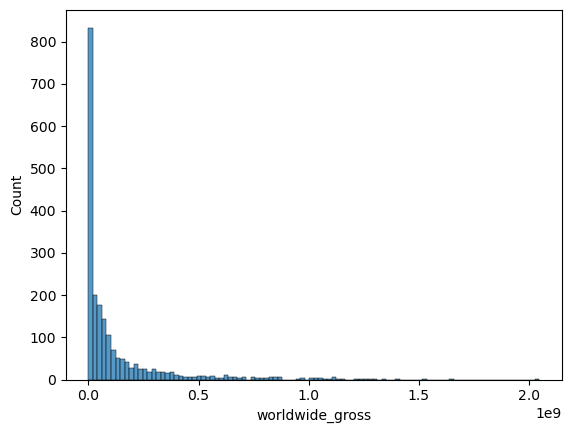

In [113]:
sns.histplot(US_MOVIES_MERGED["worldwide_gross"], bins=100)
plt.show()

## Production Budget Histogram

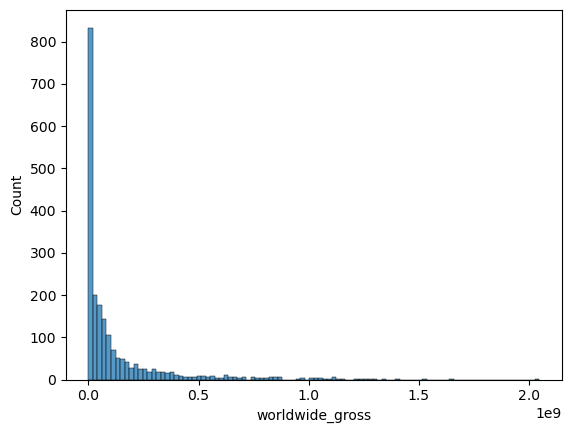

In [114]:
sns.histplot(US_MOVIES_MERGED["worldwide_gross"], bins=100)
plt.show()

## Correlation Heatmap

In [116]:
#Making Correlation Matrix
corr = US_MOVIES_MERGED.corr(numeric_only=True)

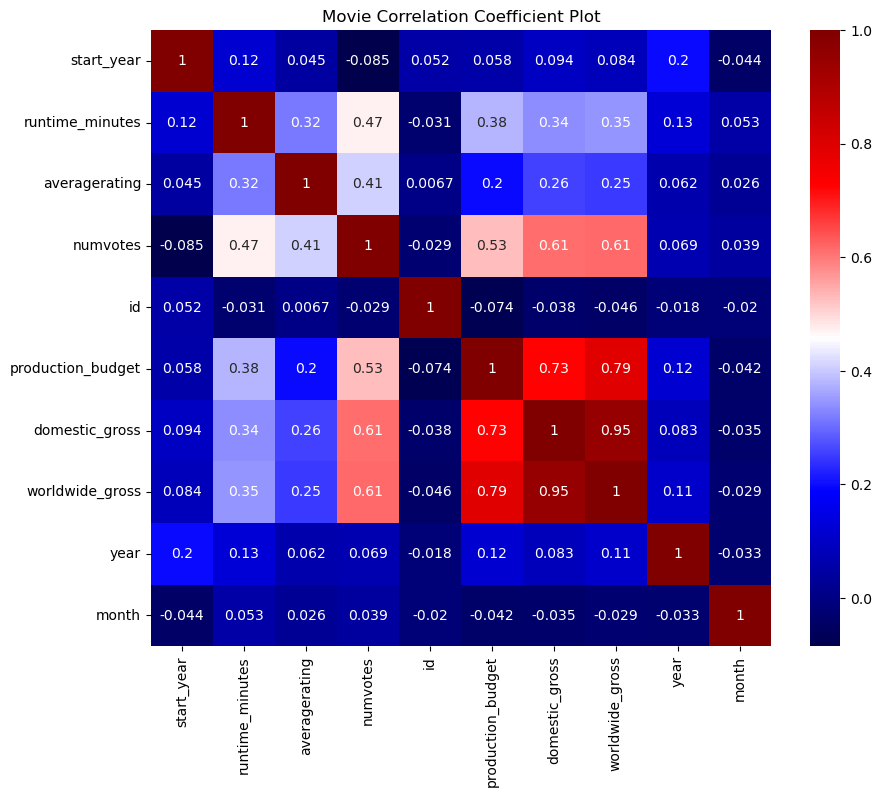

In [117]:
#Plotting Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title('Movie Correlation Coefficient Plot')
plt.show()

# Budget Conclusions

#### There is a strong .68 Correlation between Production Budget and Profit. This indicates that, generally, higher budget movies will garner higher profits

#### There is a very weak negative -0.058 Correlation Between Production Budget and Equity Multiple. This indicates that larger investments will generate large profits, but the rate of return is unrelated to production_budget or the size of investment 

# Investigating Gross Profit and Equity Multiple by Genre


### Step 1: Add Gross Profit and Equity Multiple to DataFrame

In [118]:
US_MOVIES_MERGED["Gross_Profit"] = US_MOVIES_MERGED["worldwide_gross"] - US_MOVIES_MERGED["production_budget"]

In [119]:
US_MOVIES_MERGED["Equity_Multiple"] = US_MOVIES_MERGED["Gross_Profit"]/US_MOVIES_MERGED["production_budget"]

### Step 2: Seperate Genres

In [120]:
# Seperate Genres from Genres Column utilizing get dummies
genres = US_MOVIES_MERGED["genres"].str.get_dummies(",")

In [121]:
# combining genres and US_MOVIES_MERGED to create new genres dataframe
US_MOVIES_MERGED_GENRES = pd.concat([genres, US_MOVIES_MERGED], axis=1)

In [122]:
US_MOVIES_MERGED_GENRES.head(10)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,Gross_Profit,Equity_Multiple
0,1,1,0,0,0,0,0,0,0,0,...,38,2010-07-16,inception,160000000.0,292576195.0,8.355246e+08,2010,7,6.755246e+08,4.222029
1,1,1,0,0,0,0,0,0,0,0,...,38,2010-07-16,inception,160000000.0,292576195.0,8.355246e+08,2010,7,6.755246e+08,4.222029
2,0,1,0,0,0,0,0,1,0,0,...,32,2014-11-05,interstellar,165000000.0,188017894.0,6.663794e+08,2014,11,5.013794e+08,3.038663
3,0,1,0,0,0,0,0,1,0,0,...,32,2014-11-05,interstellar,165000000.0,188017894.0,6.663794e+08,2014,11,5.013794e+08,3.038663
4,0,0,0,0,0,0,0,1,0,0,...,69,2012-12-25,django unchained,100000000.0,162805434.0,4.499483e+08,2012,12,3.499483e+08,3.499483
5,1,1,0,0,0,0,0,0,0,0,...,27,2012-05-04,the avengers,225000000.0,623279547.0,1.517936e+09,2012,5,1.292936e+09,5.746382
6,1,1,0,0,0,0,0,0,0,0,...,35,1998-08-14,the avengers,60000000.0,23385416.0,4.858542e+07,1998,8,-1.141458e+07,-0.190243
7,0,0,0,1,0,1,0,1,0,0,...,76,2013-12-25,the wolf of wall street,100000000.0,116900694.0,3.898704e+08,2013,12,2.898704e+08,2.898704
8,0,0,0,0,0,0,0,0,0,0,...,52,2010-02-19,shutter island,80000000.0,128012934.0,2.994618e+08,2010,2,2.194618e+08,2.743272
9,1,1,0,0,1,0,0,0,0,0,...,14,2014-08-01,guardians of the galaxy,170000000.0,333172112.0,7.708675e+08,2014,8,6.008675e+08,3.534515


### Step 3: Melt New Dataframe to Prepare for Data Visualization

In [123]:
#Melting Dataframe into a long-format for data-visualization and analysis by genre
US_MOVIES_MERGED_GENRES = pd.melt(US_MOVIES_MERGED_GENRES, id_vars=["domestic_gross", "release_date", "worldwide_gross", "production_budget", "Gross_Profit","Equity_Multiple"], value_vars = US_MOVIES_MERGED_GENRES.columns[0:22])

In [124]:
US_MOVIES_MERGED_GENRES

,domestic_gross,release_date,worldwide_gross,production_budget,Gross_Profit,Equity_Multiple,variable,value
0,292576195.0,2010-07-16,835524642.0,160000000.0,675524642.0,4.222029,Action,1
1,292576195.0,2010-07-16,835524642.0,160000000.0,675524642.0,4.222029,Action,1
2,188017894.0,2014-11-05,666379375.0,165000000.0,501379375.0,3.038663,Action,0
3,188017894.0,2014-11-05,666379375.0,165000000.0,501379375.0,3.038663,Action,0
4,162805434.0,2012-12-25,449948323.0,100000000.0,349948323.0,3.499483,Action,0
...,...,...,...,...,...,...,...,...
45777,14010690.0,1999-01-15,30626690.0,75000000.0,-44373310.0,-0.591644,Western,0
45778,3000342.0,2016-03-04,12905107.0,5000000.0,7905107.0,1.581021,Western,0
45779,1044143.0,2010-09-24,21270290.0,1987650.0,19282640.0,9.701225,Western,0
45780,3484331.0,1980-11-19,3484523.0,44000000.0,-40515477.0,-0.920806,Western,0


### Step 4: Filter to eliminate all 0-value dummy rows


In [125]:
US_MOVIES_MERGED_GENRES = US_MOVIES_MERGED_GENRES[US_MOVIES_MERGED_GENRES["value"] == 1]

In [126]:
US_MOVIES_MERGED_GENRES.shape

(4973, 8)

### Step 5: Groupby Genre and Aggregate to Get Mean's for Data Visualization

In [127]:
Melted_Movies_Groupby = US_MOVIES_MERGED_GENRES.groupby("variable").agg({"worldwide_gross":["mean", "std"], "domestic_gross":["mean", "std"], "Gross_Profit":["mean", "std"], "production_budget":["mean","std"], "Equity_Multiple":["mean","std"]})

In [128]:
#Add Columns to new Dataframe
Melted_Movies_Groupby.columns = ['worldwide_mean', 'worldwide_std', 'domestic_mean', 'domestic_std', "gross_mean","gross_std", "production_mean", "production_std", "EqMul_mean","EqMul_std"]

In [129]:
Melted_Movies_Groupby.head(20)

,worldwide_mean,worldwide_std,domestic_mean,domestic_std,gross_mean,gross_std,production_mean,production_std,EqMul_mean,EqMul_std
variable,,,,,,,,,,
Action,2.434534e+08,3.234681e+08,9.370650e+07,1.235982e+08,1.658154e+08,2.723502e+08,7.763799e+07,7.044256e+07,1.729000,3.014140
Adventure,3.565816e+08,3.598311e+08,1.310427e+08,1.360136e+08,2.525319e+08,3.109498e+08,1.040497e+08,7.390819e+07,2.491174,5.101606
Animation,3.519166e+08,3.052271e+08,1.290018e+08,1.114073e+08,2.608644e+08,2.674866e+08,9.105221e+07,5.891573e+07,3.479071,8.604852
Biography,7.262487e+07,9.934379e+07,3.824264e+07,5.041467e+07,4.675091e+07,8.701270e+07,2.587396e+07,2.264830e+07,2.730795,9.219585
Comedy,1.281735e+08,2.027919e+08,5.810031e+07,7.830830e+07,9.037880e+07,1.706687e+08,3.779471e+07,4.432679e+07,2.350949,5.477876
Crime,7.980749e+07,1.534304e+08,3.655405e+07,5.008551e+07,4.934484e+07,1.292556e+08,3.046265e+07,3.109057e+07,1.181349,2.621990
Documentary,2.777026e+07,6.101822e+07,1.583736e+07,2.753091e+07,1.365357e+07,5.035271e+07,1.411670e+07,2.098901e+07,1.563662,6.817307
Drama,6.877707e+07,1.217335e+08,3.254769e+07,4.912122e+07,4.382224e+07,1.010429e+08,2.495483e+07,3.291657e+07,2.508560,8.200304
Family,2.046158e+08,2.639641e+08,8.707153e+07,1.012645e+08,1.421355e+08,2.209019e+08,6.248025e+07,6.484392e+07,3.121048,9.240211


In [130]:
#reset index to make the genre variable into a column
Melted_Movies_Groupby.reset_index(inplace=True)

### Step 6: Create New Sorted DataFrames for Bar Charts

In [131]:
Melted_Movies_Groupby_GrossProfit = Melted_Movies_Groupby.sort_values(by ="gross_mean", ascending=False)

In [132]:
Melted_Movies_Groupby_ProdBud = Melted_Movies_Groupby.sort_values(by ="production_mean", ascending=False)

In [133]:
Melted_Movies_Groupby_EqMul = Melted_Movies_Groupby.sort_values(by ="EqMul_mean", ascending=False)

### Step 7: Create Bar Charts Examining Production Budget, Gross Profit, and Equity Multiple

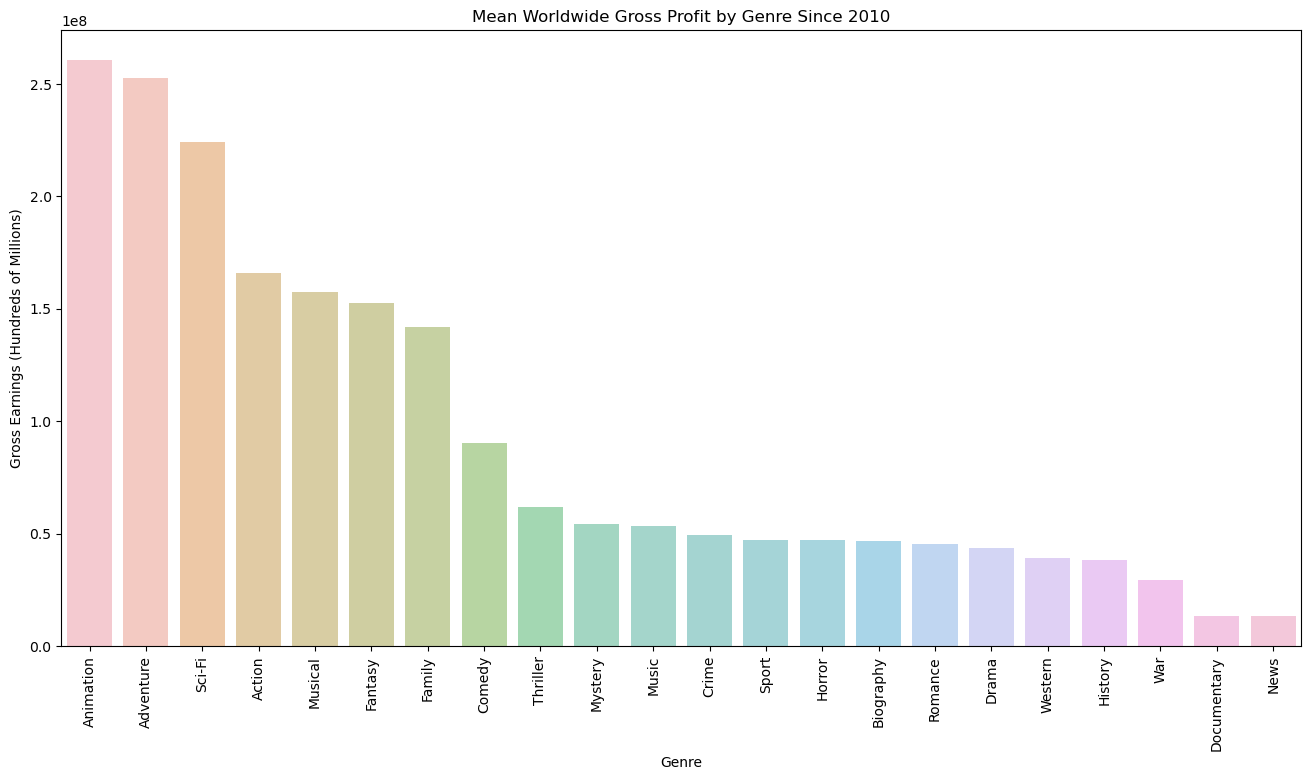

In [134]:
#Initializing Gross Profit Chart
plt.figure(figsize = (16,8))
sns.barplot(x="variable", y="gross_mean", data=Melted_Movies_Groupby_GrossProfit, alpha = 0.5)
plt.title('Mean Worldwide Gross Profit by Genre Since 2010')
plt.xlabel('Genre')
plt.ylabel('Gross Earnings (Hundreds of Millions)')
plt.xticks(rotation=90)
plt.show()


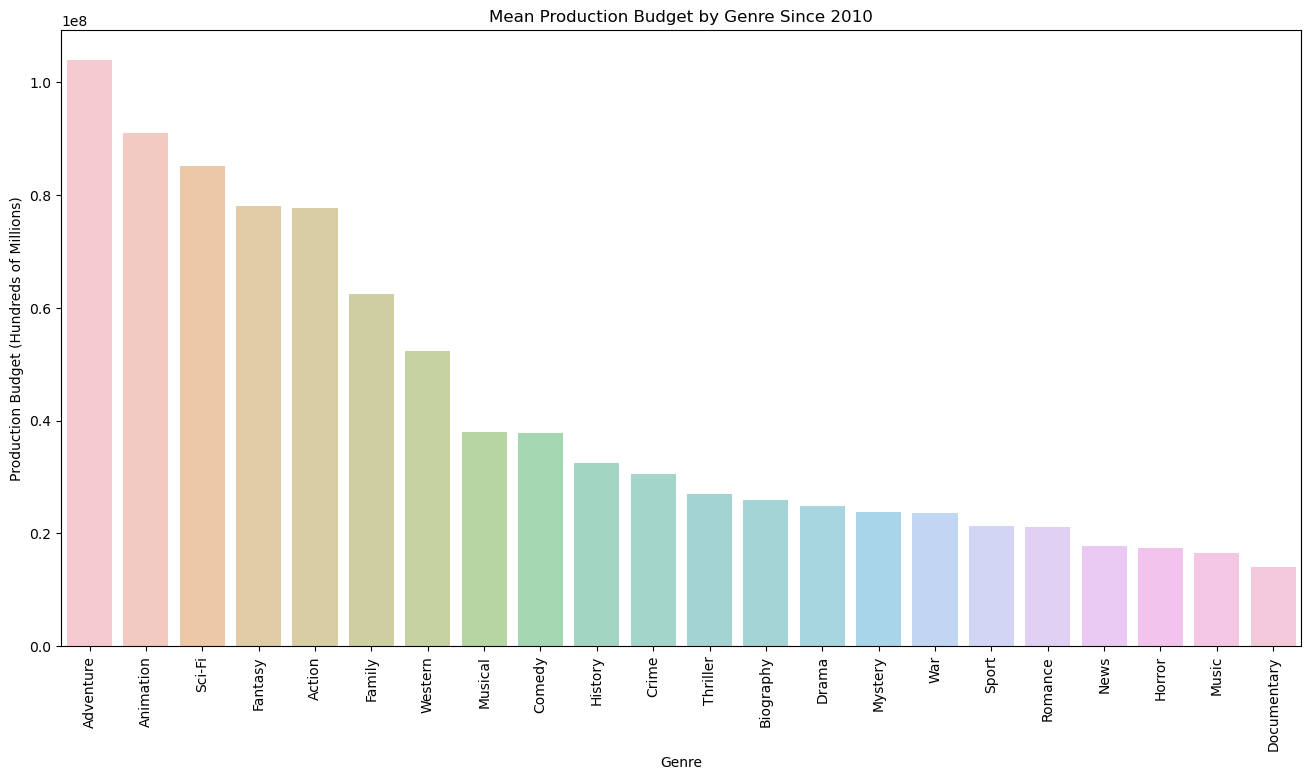

In [135]:
#Initializing Gross Profit Chart
plt.figure(figsize = (16,8))
sns.barplot(x="variable", y="production_mean", data=Melted_Movies_Groupby_ProdBud, alpha = 0.5)
plt.title('Mean Production Budget by Genre Since 2010')
plt.xlabel('Genre')
plt.ylabel('Production Budget (Hundreds of Millions)')
plt.xticks(rotation=90)
plt.show()

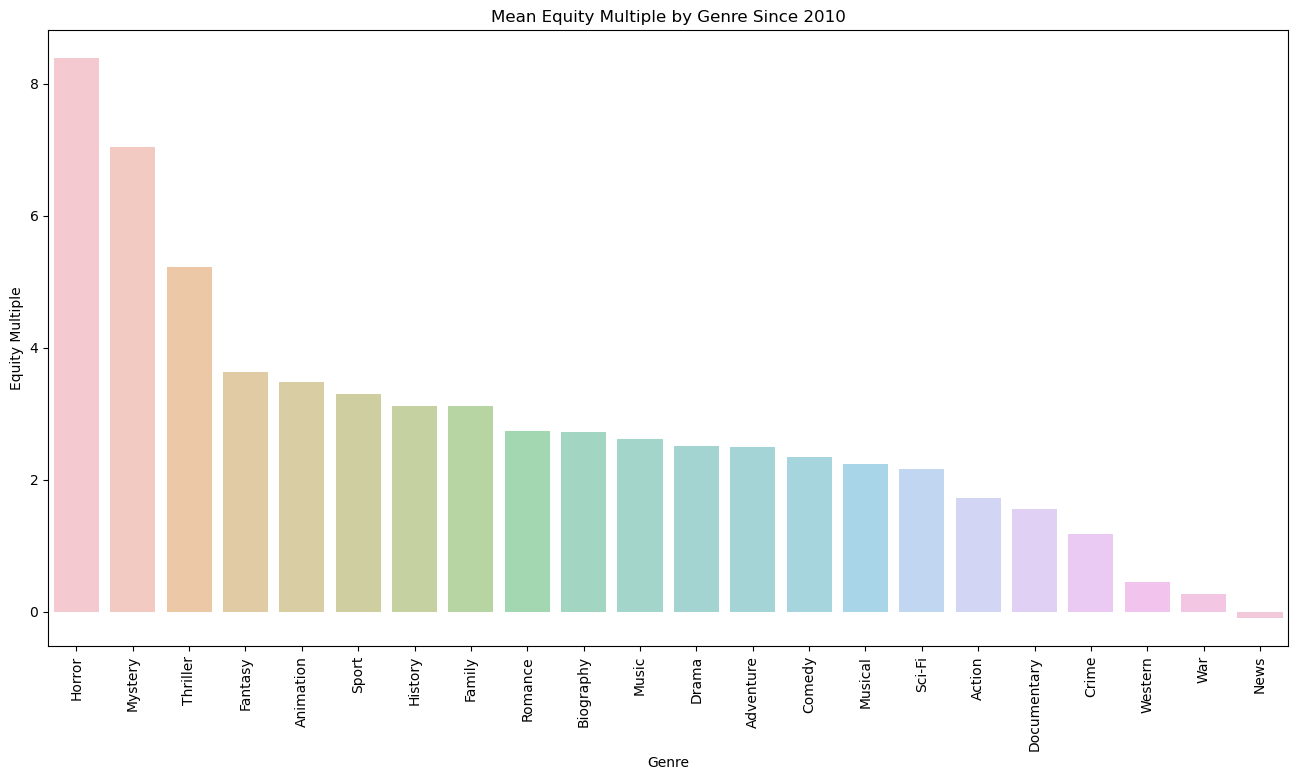

In [136]:
plt.figure(figsize = (16,8))
sns.barplot(x="variable", y="EqMul_mean", data=Melted_Movies_Groupby_EqMul, alpha = 0.5)
plt.title('Mean Equity Multiple by Genre Since 2010')
plt.xlabel('Genre')
plt.ylabel('Equity Multiple')
plt.xticks(rotation=90)
plt.show()

### Conclusions:

###### The Production Budget and Gross Profit follow very similar trends indicating the importance of production budget in predicting gross profit. Adventure, Animation, and Sci-Fi are the top genres in terms of spending and profit

###### Mean Equity Multiples, however, are substantially higher in the Horror, Mystery, and Thriller Categories all of which are in the relative mid-lower levels of production budgets

### Step 8: Boxplots

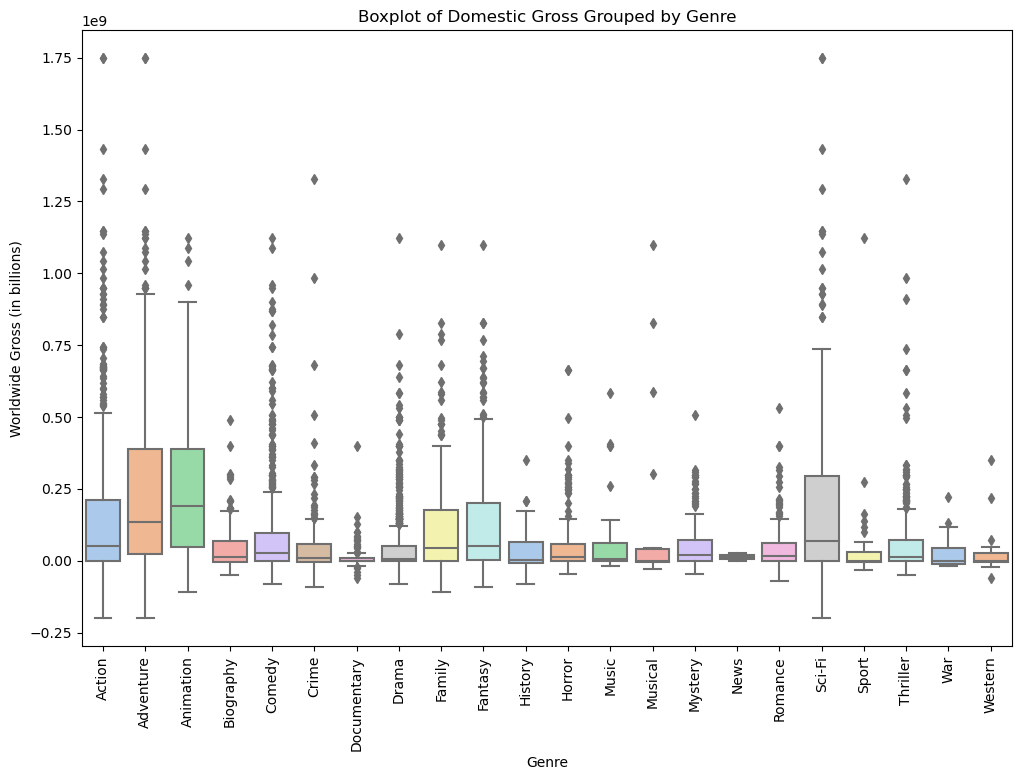

In [137]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "variable", y='Gross_Profit', data=US_MOVIES_MERGED_GENRES, palette="pastel")
plt.xticks(rotation=90) 
plt.title('Boxplot of Domestic Gross Grouped by Genre')
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross (in billions)')
plt.show()

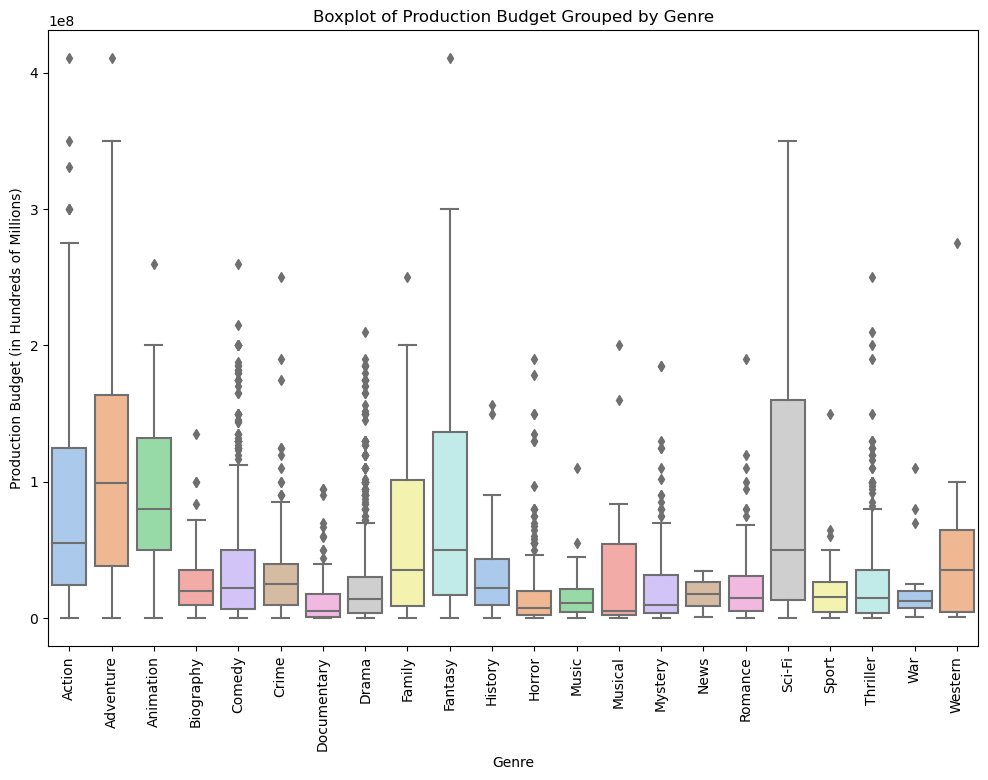

In [138]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "variable", y='production_budget', data=US_MOVIES_MERGED_GENRES, palette='pastel')
plt.xticks(rotation=90) 
plt.title('Boxplot of Production Budget Grouped by Genre')
plt.xlabel('Genre')
plt.ylabel('Production Budget (in Hundreds of Millions)')
plt.show()

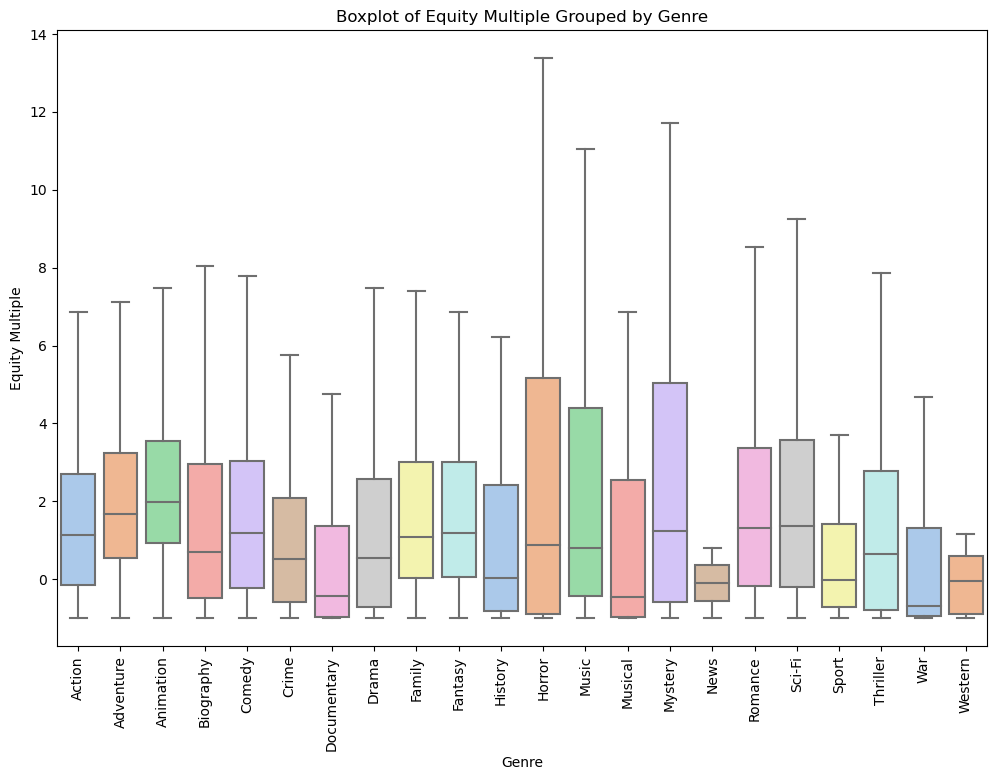

In [139]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "variable", y='Equity_Multiple', data=US_MOVIES_MERGED_GENRES, palette='pastel', showfliers=False)
plt.xticks(rotation=90) 
plt.title('Boxplot of Equity Multiple Grouped by Genre')
plt.xlabel('Genre')
plt.ylabel('Equity Multiple')
plt.show()

### Conclusions: 

######  The Boxplots demonstrate the median capital required to enter in the highest-profit generating categories such as animation, adventure and action is substantially higher than the higher end of the Horror/Mystery categories. 

###### The Animation, Adventure and Action categories have substantially higher floors in terms of equity multiples than the higher-risk categories of Horror and Mystery. Horror and Mystery cannot match the gross returns of the more capital-intensive but offer riskier but subtantially higher returns if the movie performs above the mean

## Overall Genre Recommendations

### Strategy #1: For investors with access to the requisite capital to finance the more capital intensive genres and a lower appetite for risk: We Reccommend pursuing the Animation, Adventure or Action Genres

### Strategy #2: For investors with access to less capital, want to pursue higher returns, and have an appetite for risk: We Reccommend pursuing the Horror or Mystery Genres

# Investigating Runtimes Impact on Gross Profit and Equity Multiples

### Step 1: Seperate Runtimes into Runtime Categories for Analysis

In [140]:
#Seperating Runtime_Minutes into 5 new runtime categories
US_MOVIES_MERGED["Runtime_cat"] = pd.cut(US_MOVIES_MERGED["runtime_minutes"], bins = [0,60,90,120,150, 1000], labels = ["<60","60-90","90-120", "120-150", "150+"])


### Step 2: Generate the Bar Charts

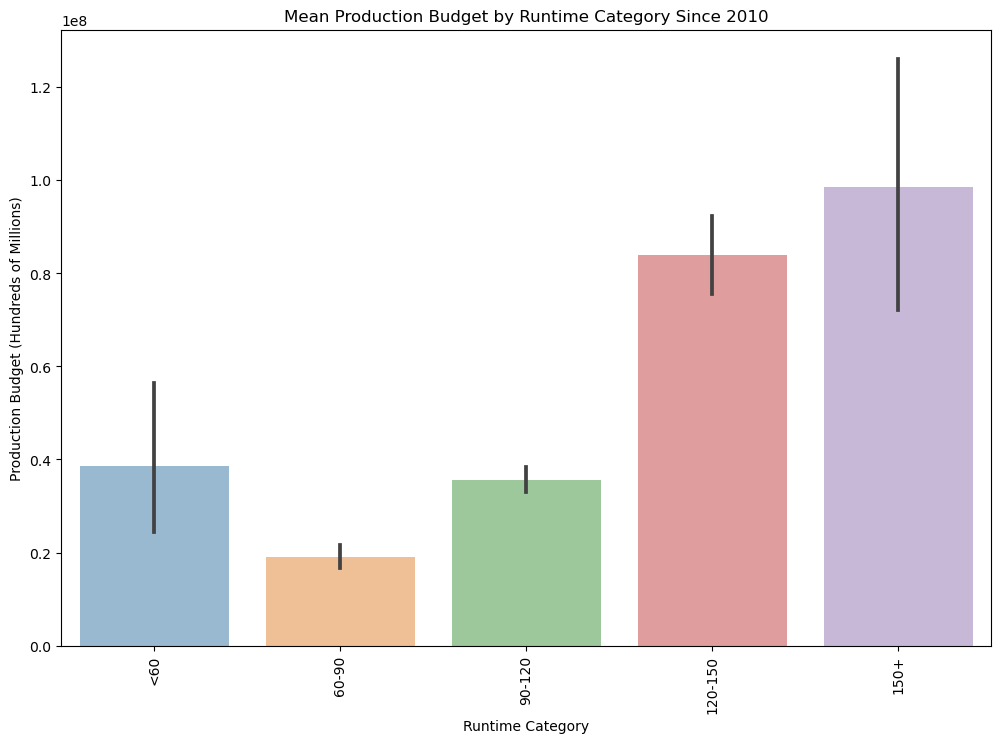

In [141]:
plt.figure(figsize=(12, 8))
sns.barplot(x= "Runtime_cat", y='production_budget', data=US_MOVIES_MERGED, label='Worldwide Gross', alpha=0.5)
plt.title('Mean Production Budget by Runtime Category Since 2010')
plt.xlabel('Runtime Category')
plt.ylabel('Production Budget (Hundreds of Millions)')
plt.xticks(rotation=90) 
plt.show()

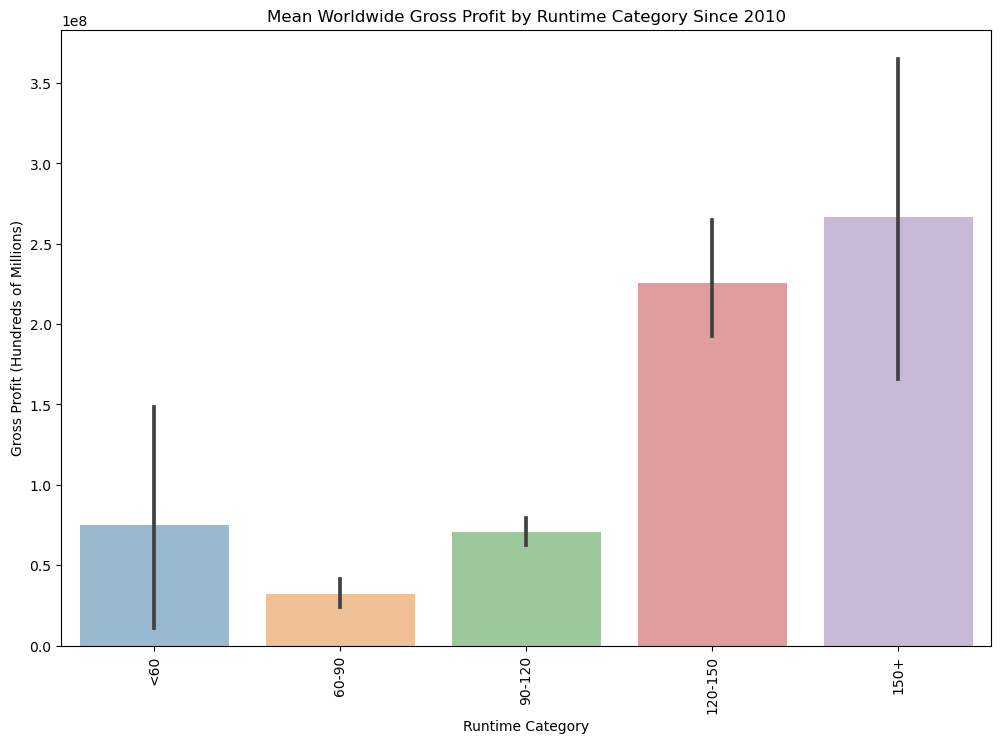

In [142]:
plt.figure(figsize=(12, 8))
sns.barplot(x= "Runtime_cat", y='Gross_Profit', data=US_MOVIES_MERGED, label='Worldwide Gross', alpha=0.5)
plt.title('Mean Worldwide Gross Profit by Runtime Category Since 2010')
plt.xlabel('Runtime Category')
plt.ylabel('Gross Profit (Hundreds of Millions)')
plt.xticks(rotation=90)
plt.show()

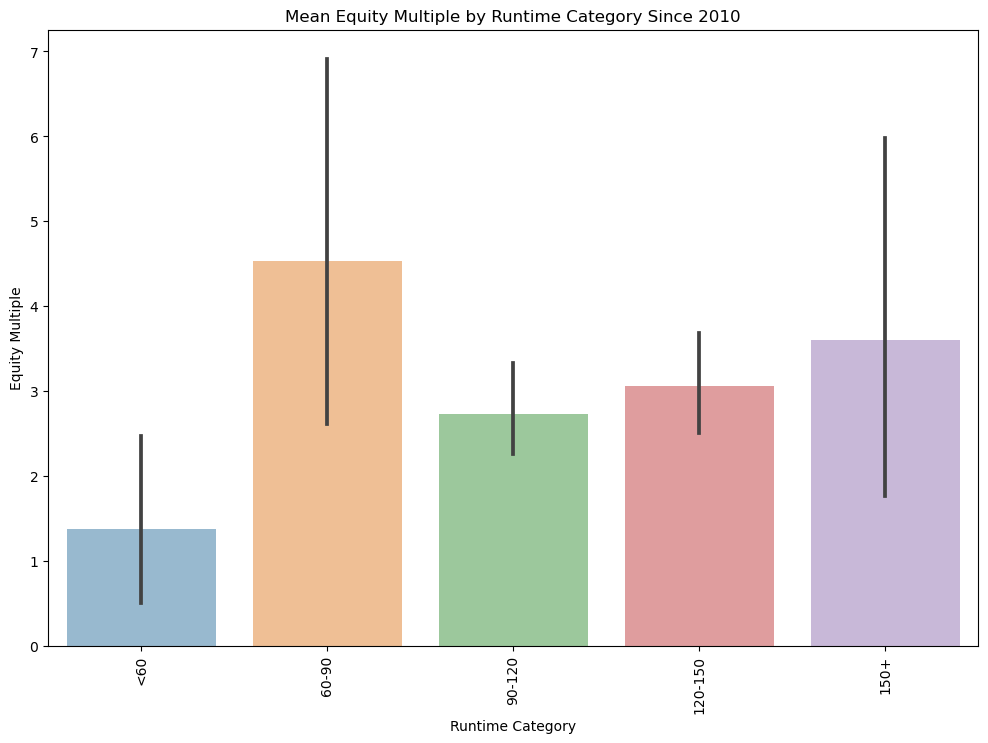

In [143]:
plt.figure(figsize=(12, 8))
sns.barplot(x= "Runtime_cat", y='Equity_Multiple', data=US_MOVIES_MERGED, label='Worldwide Gross', alpha=0.5)
plt.title('Mean Equity Multiple by Runtime Category Since 2010')
plt.xlabel('Runtime Category')
plt.ylabel('Equity Multiple')
plt.xticks(rotation=90) 
plt.show()

## Conclusions

###### Longer Movies are both more expensive and generate more gross profit. This is likely due to longer movies requiring larger production budgets and the relationship between budgets and gross profits. 

## Step 3: Generate the Boxplots

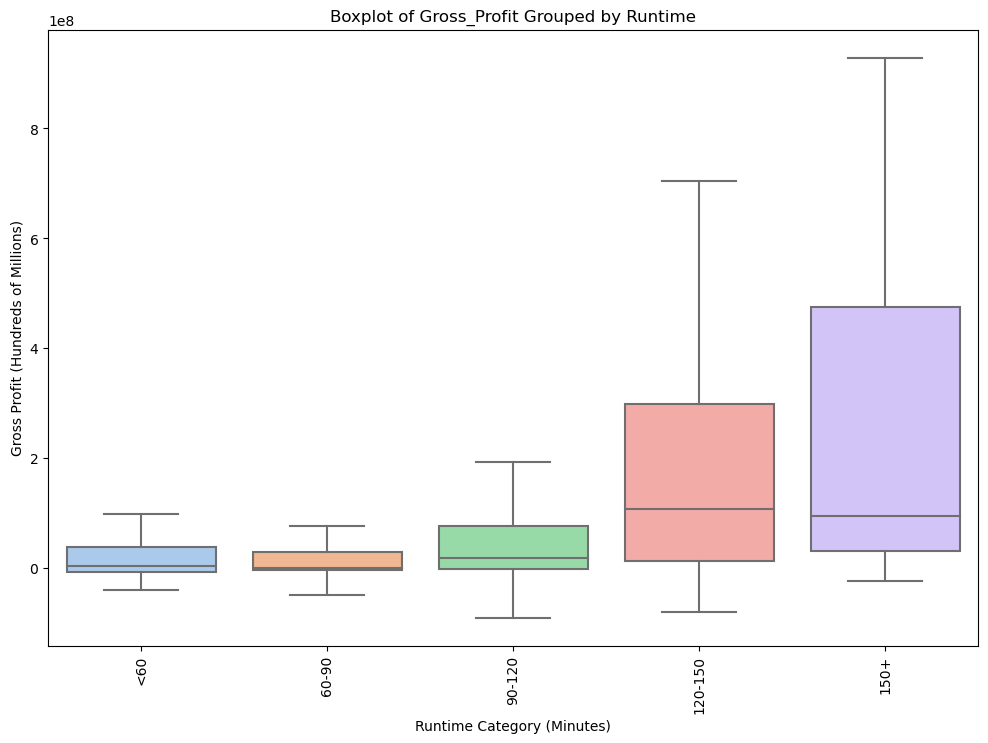

In [144]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "Runtime_cat", y='Gross_Profit', data=US_MOVIES_MERGED, palette='pastel', showfliers=False)
plt.xticks(rotation=90) 
plt.title('Boxplot of Gross_Profit Grouped by Runtime')
plt.xlabel('Runtime Category (Minutes)')
plt.ylabel("Gross Profit (Hundreds of Millions)")
plt.show()

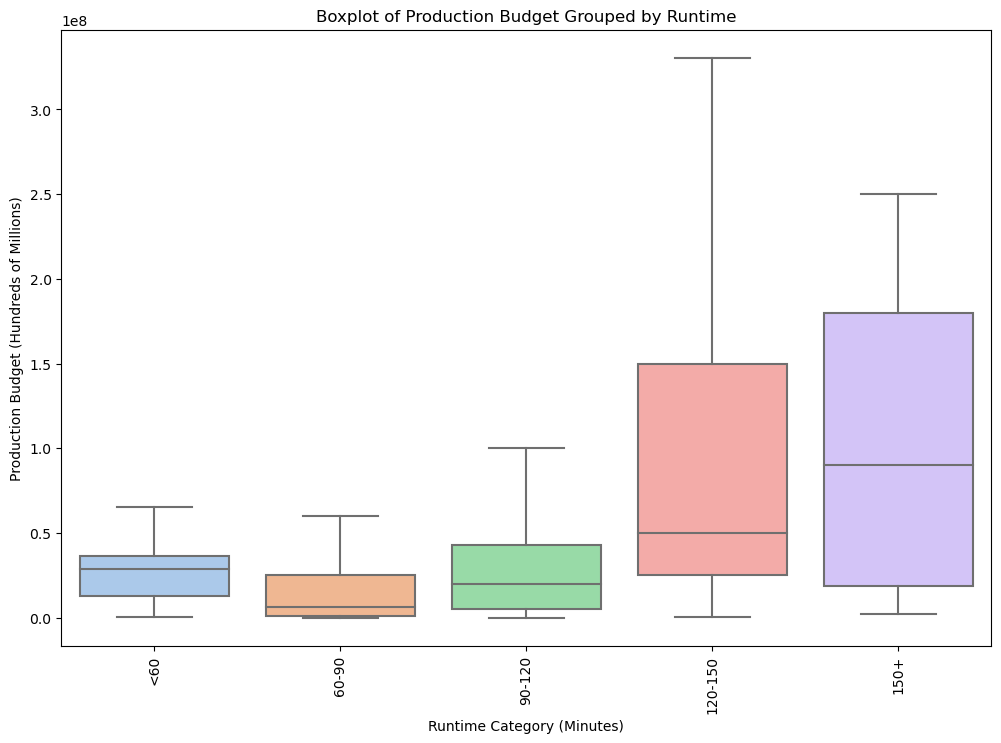

In [145]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "Runtime_cat", y='production_budget', data=US_MOVIES_MERGED, palette='pastel', showfliers=False)
plt.xticks(rotation=90) 
plt.title('Boxplot of Production Budget Grouped by Runtime')
plt.xlabel('Runtime Category (Minutes)')
plt.ylabel("Production Budget (Hundreds of Millions)")
plt.show()

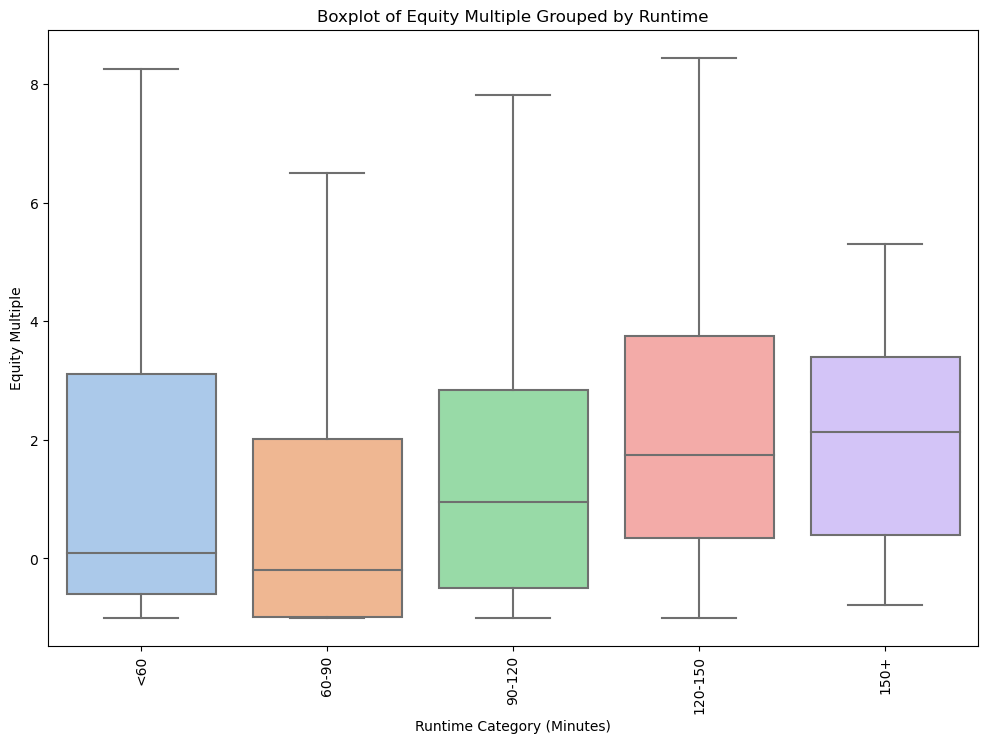

In [146]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= "Runtime_cat", y='Equity_Multiple', data=US_MOVIES_MERGED, palette='pastel', showfliers=False)
plt.xticks(rotation=90) 
plt.title('Boxplot of Equity Multiple Grouped by Runtime')
plt.xlabel('Runtime Category (Minutes)')
plt.ylabel("Equity Multiple")
plt.show()

## Conclusions: 

###### The Boxplots once again show the association between runtime, production budget, and gross profit. They, do not, however, posess any explanatory power for Equity Multiple

# Runtime Conclusions: 

#### Runtime should be selected in accordance with the chosen genre and budget. In general: Strategy 1 should produce movies with longer runtimes while Strategy 2 should produce movies with shorter runtimes

# Strategic Recommendations on Movie Genres Analysis
 Gloria Pintado & Jack Halper Phase 2 DS Live

In [1]:
ls

Gloria_notebook.ipynb      gitignore
Jacks_Polished_Book.ipynb  images/
README.md                  zippedData/


In [5]:
#imported several Python libraries and modules needed
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from IPython.display import Image
import warnings 

warnings.filterwarnings('ignore')


### Exploring Tables

In [6]:
#read a CSV file named 'tn.movie_budgets.csv' inside file 'zippedData/'
revenue = pd.read_csv('zippedData/tn.movie_budgets.csv')
revenue.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### SQL Table

In [7]:
#connecting to a SQLite database name 'im.db'
conn = sqlite3.connect('zippedData/im.db')

In [8]:
#create a cursor 
cur = conn.cursor()
# execute a query for finding the table names
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
#fetch the results(tables)
cur.fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

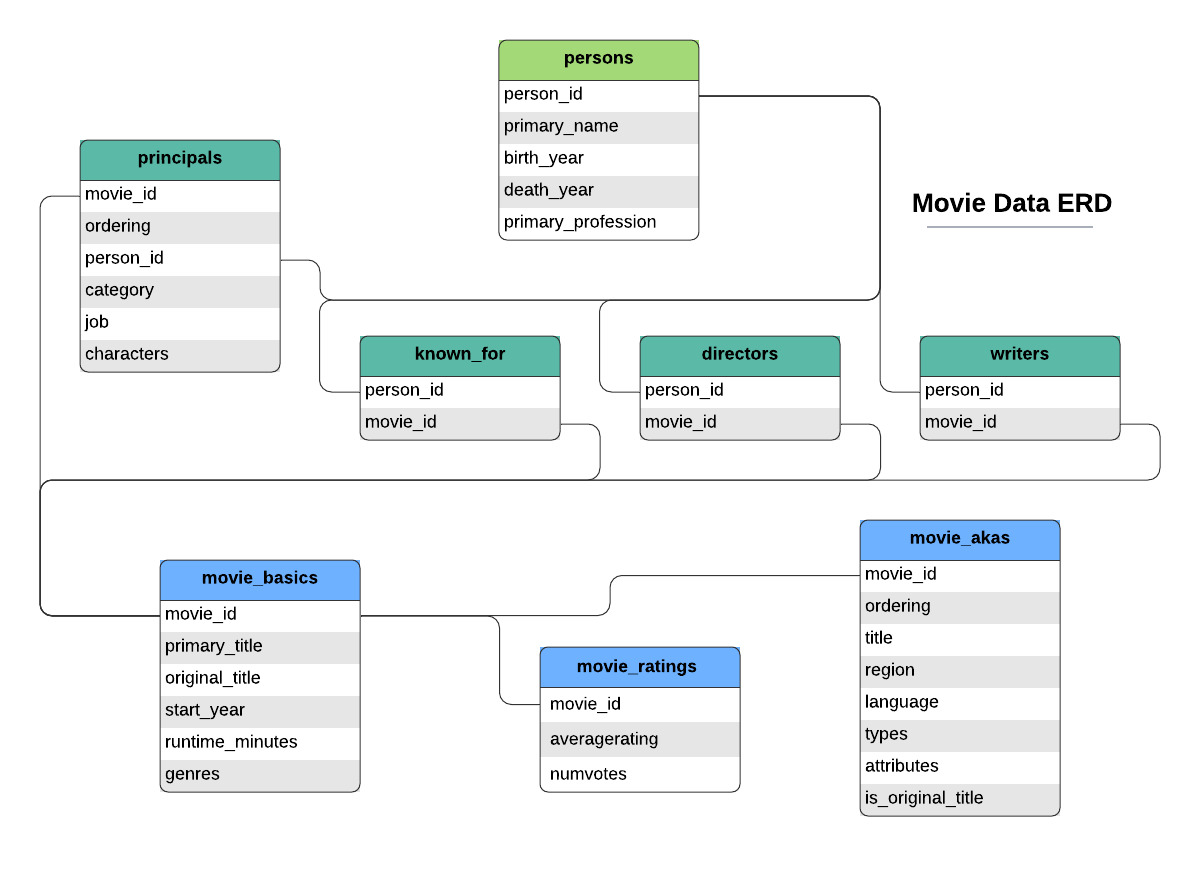

### Observations

- Collect monthly information to see when movies are released, making better profits and getting the highest return on investment.
- Which directors make the highest profit in genres such as adventure, animation, horror, and mystery, and also which director makes this kind of movie with the best ROI?
  

# Finding out with the Revenue Table which time of the year is best to take out a film!

In [9]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Converting Data

In [10]:
# cleaning monetary values and converting the cleaned values to numeric data 
def clean_and_convert(column):
    return pd.to_numeric(column.str.replace('[\$,]', '', regex=True))

revenue['production_budget'] = clean_and_convert(revenue['production_budget'])
revenue['domestic_gross'] = clean_and_convert(revenue['domestic_gross'])
revenue['worldwide_gross'] = clean_and_convert(revenue['worldwide_gross'])

In [11]:
revenue = revenue.astype({"production_budget":"int64",
                          "domestic_gross":"int64",
                          "worldwide_gross":"int64"})
revenue['release_date'] = pd.to_datetime(revenue['release_date'])
revenue['release_month'] = revenue['release_date'].dt.month
revenue['release_month'] = revenue['release_date'].dt.strftime('%b')
revenue = revenue.rename(columns={'movie': 'title'})

In [12]:
revenue.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec


## Finding out Worldwide Profit

In [13]:
#calculating the worldwide profit
revenue['worldwide_profit'] = revenue['worldwide_gross'] - revenue['production_budget']

In [14]:
revenue

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_month,worldwide_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Jun,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,999721747
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,Dec,-7000
5778,79,1999-04-02,Following,6000,48482,240495,Apr,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,Jul,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,Sep,-1400


In [15]:
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the monthly mean worldwide profit
monthly_mean_worldwide_profit = revenue.groupby('release_month')['worldwide_profit'].mean()

# Sort the results by custom order
sorted_monthly_mean_profit = monthly_mean_worldwide_profit.loc[custom_order]

# Print or display the sorted results
print(sorted_monthly_mean_profit)

release_month
Jan    2.572033e+07
Feb    4.349811e+07
Mar    4.985129e+07
Apr    3.611743e+07
May    1.151328e+08
Jun    9.942391e+07
Jul    9.841746e+07
Aug    3.542232e+07
Sep    2.488078e+07
Oct    2.907190e+07
Nov    9.314157e+07
Dec    6.844157e+07
Name: worldwide_profit, dtype: float64


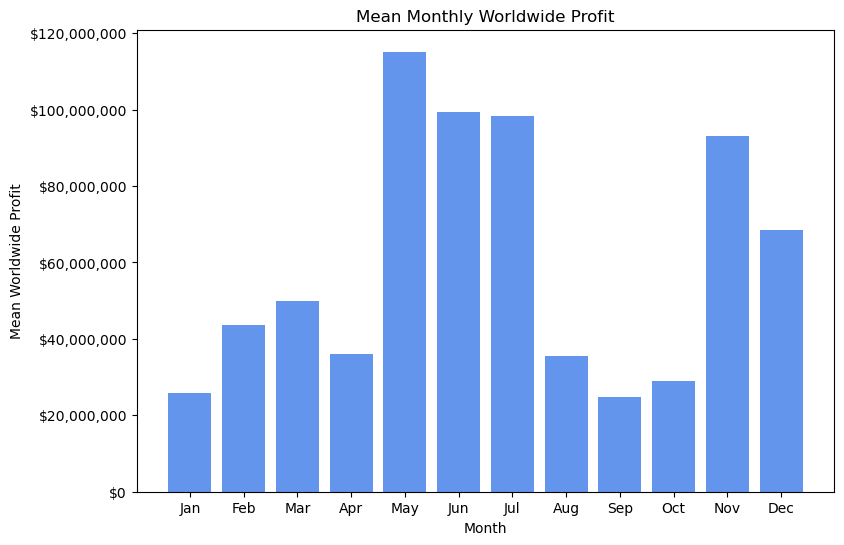

In [16]:
# Calculate the monthly mean worldwide profit
monthly_mean_worldwide_profit = revenue.groupby('release_month')['worldwide_profit'].mean()

# Sort the results by custom order
sorted_monthly_mean_profit = monthly_mean_worldwide_profit.loc[custom_order]

# Create a bar chart
plt.figure(figsize=(9, 6))
plt.bar(sorted_monthly_mean_profit.index, sorted_monthly_mean_profit.values, color='cornflowerblue')

# Use FuncFormatter to format y-axis labels as $
def currency_formatter(x, pos):
    return "${:,.0f}".format(x)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

plt.title('Mean Monthly Worldwide Profit')
plt.xlabel('Month')
plt.ylabel('Mean Worldwide Profit')
plt.show()

Observation

- The best time for more profits either domestically or worldwide is in summer and holidays at the end of the year.

## Finding out Equity Multiple Worldwide

In [17]:
#statistic used to evaluate return on investment (ROI)
revenue['Equity_multiple_Worldwide'] = revenue['worldwide_profit'] / revenue['production_budget']

In [18]:
Equity_multiple_Worldwide = revenue.sort_values(by='Equity_multiple_Worldwide', ascending=False)

In [19]:
Monthly_Equity_multiple_Worldwide = revenue.groupby('release_month')['Equity_multiple_Worldwide'].mean()

In [20]:
Equity_multiple_Worldwide

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_month,worldwide_profit,Equity_multiple_Worldwide
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,Jun,44975000,1799.000000
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,Mar,99550000,497.750000
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,Sep,193733034,430.517853
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,Jul,41556474,415.564740
5406,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,Jul,247700000,412.833333
...,...,...,...,...,...,...,...,...,...
5522,23,2014-12-31,Pancakes,400000,0,0,Dec,-400000,-1.000000
5521,22,2005-11-04,Show Me,400000,0,0,Nov,-400000,-1.000000
5520,21,1986-04-01,My Beautiful Laundrette,400000,0,0,Apr,-400000,-1.000000
5116,17,2015-09-08,Checkmate,1500000,0,0,Sep,-1500000,-1.000000


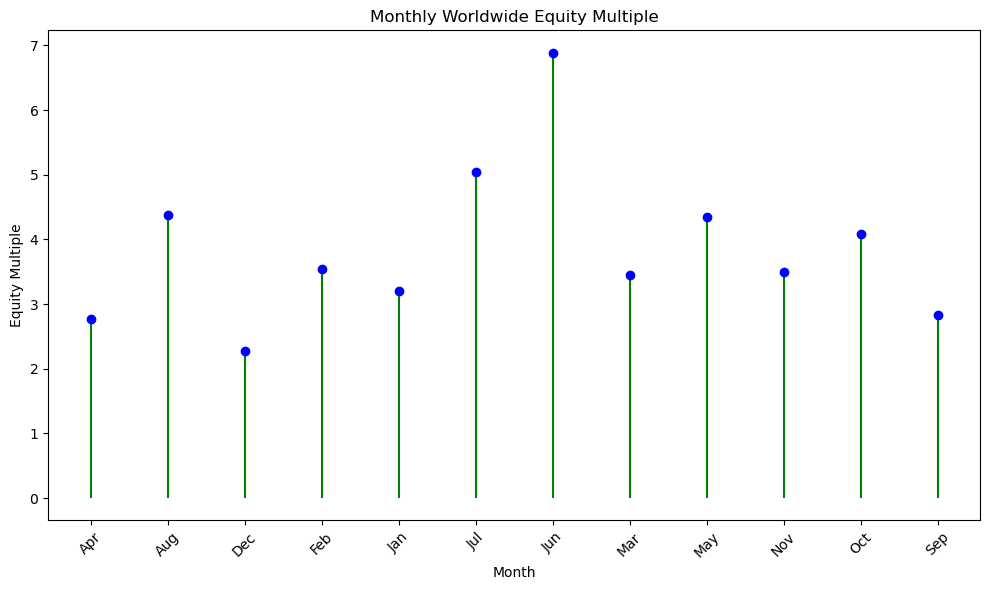

In [21]:
plt.figure(figsize=(10, 6))
# Plot the stems (vertical lines)
plt.stem(Monthly_Equity_multiple_Worldwide.index, Monthly_Equity_multiple_Worldwide.values, linefmt='-g', markerfmt='bo', basefmt=' ')

# Add labels and titles
plt.xlabel('Month')
plt.ylabel('Equity Multiple')
plt.title('Monthly Worldwide Equity Multiple')

# Format y-axis ticks as currency
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

Observation

- June has the highest multiple equity.  

## SQL  To Find out Best directors for Strategy #1 and Strategy #2

In [22]:
revenue.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_month,worldwide_profit,Equity_multiple_Worldwide
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Dec,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Jun,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,999721747,3.153696


### Data Cleaning Revenue Table for Merging a Query

In [23]:
#get a new dataframe with only the columns needed for this analysis
columns_to_drop = ['production_budget','domestic_gross','worldwide_gross']
Revenue_for_SQL = revenue.drop(columns=columns_to_drop)
Revenue_for_SQL

,id,release_date,title,release_month,worldwide_profit,Equity_multiple_Worldwide
0,1,2009-12-18,Avatar,Dec,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,May,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,Jun,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,May,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,Dec,999721747,3.153696
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,Dec,-7000,-1.000000
5778,79,1999-04-02,Following,Apr,234495,39.082500
5779,80,2005-07-13,Return to the Land of Wonders,Jul,-3662,-0.732400
5780,81,2015-09-29,A Plague So Pleasant,Sep,-1400,-1.000000


### Create a query where only directors of US show only

In [24]:
us_directors = pd.read_sql("""
SELECT primary_name, title
FROM movie_akas 
JOIN principals 
    USING(movie_id)
JOIN persons
    USING(person_id)
WHERE region = "US"
AND category = 'director'
""", conn)
us_directors

,primary_name,title
0,Colin Trevorrow,Jurassic World 3D
1,Colin Trevorrow,Jurassic World
2,Colin Trevorrow,Ebb Tide
3,Colin Trevorrow,Jurassic Park IV
4,Colin Trevorrow,Jurassic Park 4
...,...,...
51278,Anthony Power,Coconut The Little Dragon Into The Jungle
51279,Anthony Power,Coconut the Little Dragon 2 Into the Jungle
51280,Penny Lane,Hail Satan?
51281,Jeremiah Jones,Alien Warfare


### Merging the Clean Revenue Table with the SLQ Query Above

In [25]:
US_directors_revenue = Revenue_for_SQL.merge(us_directors , on = ["title"])
US_directors_revenue

,id,release_date,title,release_month,worldwide_profit,Equity_multiple_Worldwide,primary_name
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,May,635063875,1.546673,Rob Marshall
1,3,2019-06-07,Dark Phoenix,Jun,-200237650,-0.572108,Simon Kinberg
2,4,2015-05-01,Avengers: Age of Ultron,May,1072413963,3.243841,Joss Whedon
3,7,2018-04-27,Avengers: Infinity War,Apr,1748134200,5.827114,Anthony Russo
4,7,2018-04-27,Avengers: Infinity War,Apr,1748134200,5.827114,Joe Russo
...,...,...,...,...,...,...,...
2399,68,2001-07-06,Cure,Jul,84596,8.459600,Hayden Crocker
2400,68,2001-07-06,Cure,Jul,84596,8.459600,Charlie Mauck
2401,68,2001-07-06,Cure,Jul,84596,8.459600,Mattijs Vanmaaren
2402,81,2015-09-29,A Plague So Pleasant,Sep,-1400,-1.000000,Benjamin Roberds


In [26]:
US_directors_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         2404 non-null   int64         
 1   release_date               2404 non-null   datetime64[ns]
 2   title                      2404 non-null   object        
 3   release_month              2404 non-null   object        
 4   worldwide_profit           2404 non-null   int64         
 5   Equity_multiple_Worldwide  2404 non-null   float64       
 6   primary_name               2404 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 131.6+ KB


### Create a SQL Query of Types of Genres directed by US only

In [27]:
US_GENRES = pd.read_sql("""
SELECT region, genres, primary_name, averagerating, numvotes, category
FROM persons 
JOIN principals 
    USING(person_id)
JOIN movie_akas
    USING(movie_id)
JOIN Movie_basics
USING(movie_id)
JOIN Movie_ratings
USING(movie_id)
WHERE region = "US"
AND category = 'director'
""", conn)
US_GENRES

,region,genres,primary_name,averagerating,numvotes,category
0,US,Drama,Alyssa R. Bennett,7.2,88,director
1,US,"Comedy,Drama,Music",Ethan Coen,6.3,111422,director
2,US,"Comedy,Drama,Music",Joel Coen,6.3,111422,director
3,US,"Adventure,Drama,Mystery",Stephen Daldry,6.9,93164,director
4,US,"Adventure,Drama,Mystery",Stephen Daldry,6.9,93164,director
...,...,...,...,...,...,...
31404,US,Thriller,Danny Buday,5.5,102,director
31405,US,"Comedy,Horror",Keola Racela,7.5,33,director
31406,US,"Comedy,Horror",Keola Racela,7.5,33,director
31407,US,Drama,Helena Ignez,5.8,17,director


### Merge The US Directors Revenues with the US Genres query

In [28]:
US_directors_revenue = US_GENRES.merge(US_directors_revenue , on = ["primary_name"])
US_directors_revenue.head()

,region,genres,primary_name,averagerating,numvotes,category,id,release_date,title,release_month,worldwide_profit,Equity_multiple_Worldwide
0,US,"Comedy,Drama,Music",Ethan Coen,6.3,111422,director,29,2010-12-22,True Grit,Dec,217276928,6.207912
1,US,"Comedy,Drama,Music",Ethan Coen,6.3,111422,director,94,2013-12-06,Inside Llewyn Davis,Dec,21943247,1.994841
2,US,"Drama,Music",Ethan Coen,7.5,123759,director,29,2010-12-22,True Grit,Dec,217276928,6.207912
3,US,"Drama,Music",Ethan Coen,7.5,123759,director,94,2013-12-06,Inside Llewyn Davis,Dec,21943247,1.994841
4,US,"Adventure,Drama,Western",Ethan Coen,7.6,284034,director,29,2010-12-22,True Grit,Dec,217276928,6.207912


In [29]:
# convert categorical variables into indicator variables. (Where 0 = Not that genre or 1 = It has that genre)
genres_movies = US_directors_revenue["genres"].str.get_dummies(",")

In [30]:
#concatenate the genres_movies DataFrame with the US_directors_revenue 
US_MOVIES_MERGED_GENRES_NEW = pd.concat([genres_movies, US_directors_revenue], axis=1)
US_MOVIES_MERGED_GENRES_NEW.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,primary_name,averagerating,numvotes,category,id,release_date,title,release_month,worldwide_profit,Equity_multiple_Worldwide
0,0,0,0,0,1,0,0,1,0,0,...,Ethan Coen,6.3,111422,director,29,2010-12-22,True Grit,Dec,217276928,6.207912
1,0,0,0,0,1,0,0,1,0,0,...,Ethan Coen,6.3,111422,director,94,2013-12-06,Inside Llewyn Davis,Dec,21943247,1.994841
2,0,0,0,0,0,0,0,1,0,0,...,Ethan Coen,7.5,123759,director,29,2010-12-22,True Grit,Dec,217276928,6.207912
3,0,0,0,0,0,0,0,1,0,0,...,Ethan Coen,7.5,123759,director,94,2013-12-06,Inside Llewyn Davis,Dec,21943247,1.994841
4,0,1,0,0,0,0,0,1,0,0,...,Ethan Coen,7.6,284034,director,29,2010-12-22,True Grit,Dec,217276928,6.207912


# Strategy #1 
## The genres Animation & Adventure best fit if having Capital Intensive/Risk Averse

### Adventure Genre

In [31]:
melted_movies = pd.melt(US_MOVIES_MERGED_GENRES_NEW, id_vars=["release_date","title",  "worldwide_profit","Equity_multiple_Worldwide"],\
                value_vars = US_MOVIES_MERGED_GENRES_NEW.columns[0:22])

In [32]:
genres_needed = ['Adventure']
adventure_melted_movies_filtered = melted_movies[(melted_movies["release_date"].dt.year > 2009) &( melted_movies["value"] == 1)  &
                         (melted_movies["variable"].isin(genres_needed))]

Polish_aventure = adventure_melted_movies_filtered.drop_duplicates()
aventure_US_directors_revenue = Polish_aventure.merge(us_directors , on = ["title"])
aventure_US_directors_revenue.sort_values(by='worldwide_profit', ascending=False)
Polish_aventure2 = aventure_US_directors_revenue.drop_duplicates()
Polish_aventure2

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
0,2010-12-22,True Grit,217276928,6.207912,Adventure,1,Ethan Coen
1,2010-12-22,True Grit,217276928,6.207912,Adventure,1,Joel Coen
2,2013-12-06,Inside Llewyn Davis,21943247,1.994841,Adventure,1,Ethan Coen
3,2013-12-06,Inside Llewyn Davis,21943247,1.994841,Adventure,1,Joel Coen
4,2011-12-25,Extremely Loud and Incredibly Close,15247881,0.381197,Adventure,1,Stephen Daldry
...,...,...,...,...,...,...,...
798,2019-01-25,The Kid Who Would Be King,-30651554,-0.519518,Adventure,1,Joe Cornish
799,2019-06-07,Dark Phoenix,-200237650,-0.572108,Adventure,1,Simon Kinberg
800,2018-09-28,Smallfoot,133691277,1.671141,Adventure,1,Karey Kirkpatrick
801,2018-09-28,Smallfoot,133691277,1.671141,Adventure,1,Jason Reisig


In [33]:
Polish_aventure2.loc[Polish_aventure2['primary_name'] == 'Adam Green']
Polish_aventure2 = Polish_aventure2[(Polish_aventure2['title'] != 'Frozen') | (Polish_aventure2['primary_name'] != 'Adam Green')]

In [34]:
aventure_director_profit_mean = Polish_aventure2.groupby('primary_name')['worldwide_profit'].mean()
aventure_director_profit_mean.sort_values(ascending=False).head(5)

primary_name
Joss Whedon      1.182675e+09
Jennifer Lee     1.122470e+09
Chris Buck       1.122470e+09
Anthony Russo    1.060869e+09
Joe Russo        1.060869e+09
Name: worldwide_profit, dtype: float64

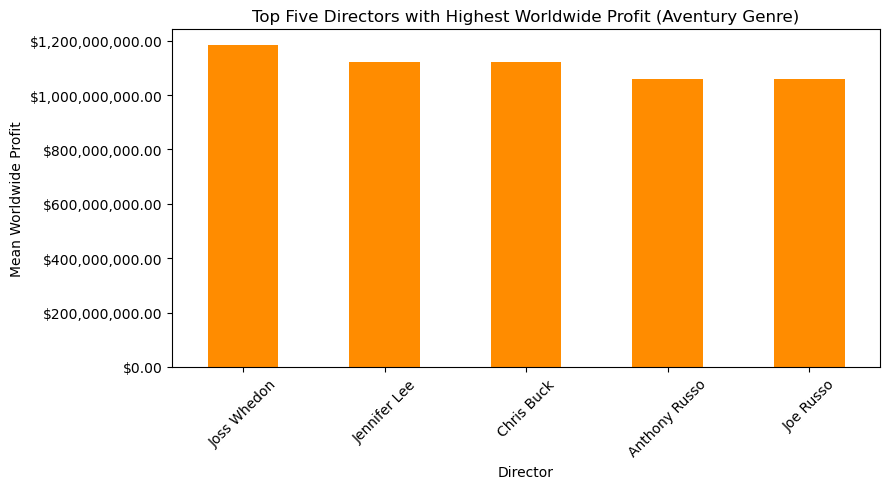

In [35]:
aventure_director_profit_mean = Polish_aventure2.groupby('primary_name')['worldwide_profit'].mean()

top_aventure_directors = aventure_director_profit_mean.sort_values(ascending=False).head(5)
# Function to format y-axis as currency
def currency_formatter(x, pos):
    return '${:,.2f}'.format(x)

# Plotting the data
plt.figure(figsize=(9, 5))
top_aventure_directors.plot(kind='bar', color='darkorange')
plt.title('Top Five Directors with Highest Worldwide Profit (Aventury Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Worldwide Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Apply the currency formatter to the y-axis
formatter = ticker.FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.grid(False)

# Show the plot
plt.show()

In [36]:
aventure_directors_Equity_multiple_Worldwide = Polish_aventure2.groupby('primary_name')['Equity_multiple_Worldwide'].mean()
top_directors_aventure_high_equity = aventure_directors_Equity_multiple_Worldwide.sort_values(ascending=False).head(10)
top_directors_aventure_high_equity

primary_name
Fabrice Gobert       28.761302
Adam Shaw            28.761302
Gregori J. Martin    28.761302
Jose G. Ramos        28.761302
Holly Bell           28.242602
Brian Brightly       26.179241
Tom Boyle            26.179241
Jeff Wadlow          26.179241
Adam Wingard         25.887177
James Wan            23.563857
Name: Equity_multiple_Worldwide, dtype: float64

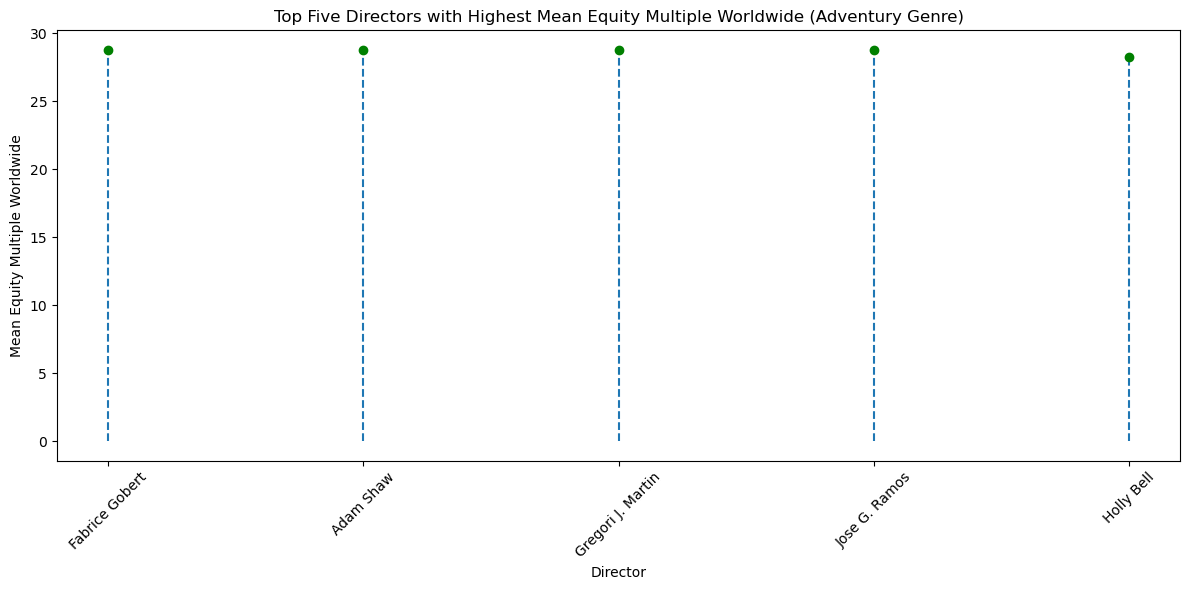

In [37]:
# Sort the data in descending order based on the mean Equity_multiple_Worldwide
top_directors = top_directors_aventure_high_equity.sort_values(ascending=False).head(5)

# Create a lollipop graph to visualize the top five directors with high Equity_multiple_Worldwide
plt.figure(figsize=(12, 6))
plt.stem(top_directors.index, top_directors.values, linefmt='--', markerfmt='go', basefmt=' ')
plt.title('Top Five Directors with Highest Mean Equity Multiple Worldwide (Adventury Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Equity Multiple Worldwide')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

### Animation Genre

In [38]:
genres_needed = ['Animation']
animation_melted_movies_filtered = melted_movies[(melted_movies["release_date"].dt.year > 2009) &( melted_movies["value"] == 1)  &
    (melted_movies["variable"].isin(genres_needed))]

Polish_animation = animation_melted_movies_filtered.drop_duplicates()
animation_US_directors_revenue = Polish_animation.merge(us_directors , on = ["title"])
animation_US_directors_revenue.sort_values(by='worldwide_profit', ascending=False)
Final_Polish_animation = animation_US_directors_revenue.drop_duplicates()
Final_Polish_animation.head()

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
0,2016-09-23,Storks,113353431,1.619335,Animation,1,Nicholas Stoller
1,2016-09-23,Storks,113353431,1.619335,Animation,1,Doug Sweetland
2,2010-06-04,Get Him to the Greek,51455875,1.286397,Animation,1,Nicholas Stoller
3,2016-05-20,Neighbors 2: Sorority Rising,73757621,2.107361,Animation,1,Nicholas Stoller
4,2012-04-27,The Five-Year Engagement,31623819,1.054127,Animation,1,Nicholas Stoller


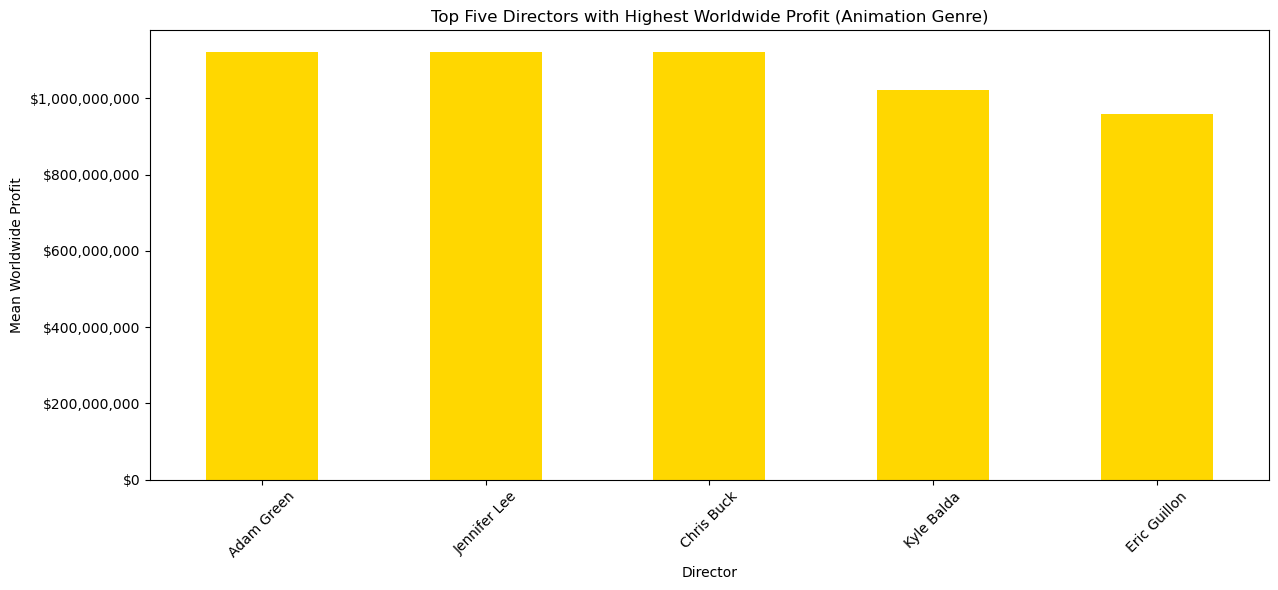

In [39]:
animation_director_profit_mean = Final_Polish_animation.groupby('primary_name')['worldwide_profit'].mean()

# Sort the data in descending order based on the mean worldwide profit
top_directors = animation_director_profit_mean.sort_values(ascending=False).head(5)

# Function to format y-axis as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create a bar plot to visualize the top five directors with high worldwide profit
plt.figure(figsize=(12, 6))
ax = top_directors.plot(kind='bar', color='gold')
plt.title('Top Five Directors with Highest Worldwide Profit (Animation Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Worldwide Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Apply currency formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()

In [40]:
Final_Polish_animation.groupby('primary_name')['worldwide_profit'].mean()
Final_Polish_animation.sort_values(by='Equity_multiple_Worldwide', ascending=False)
Final_Polish_animation.head()

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
0,2016-09-23,Storks,113353431,1.619335,Animation,1,Nicholas Stoller
1,2016-09-23,Storks,113353431,1.619335,Animation,1,Doug Sweetland
2,2010-06-04,Get Him to the Greek,51455875,1.286397,Animation,1,Nicholas Stoller
3,2016-05-20,Neighbors 2: Sorority Rising,73757621,2.107361,Animation,1,Nicholas Stoller
4,2012-04-27,The Five-Year Engagement,31623819,1.054127,Animation,1,Nicholas Stoller


In [41]:
animation_directors_Equity_multiple_Worldwide = Final_Polish_animation.groupby('primary_name')['Equity_multiple_Worldwide'].mean()
top_directors_animation_high_equity = animation_directors_Equity_multiple_Worldwide.sort_values(ascending=False).head(5)

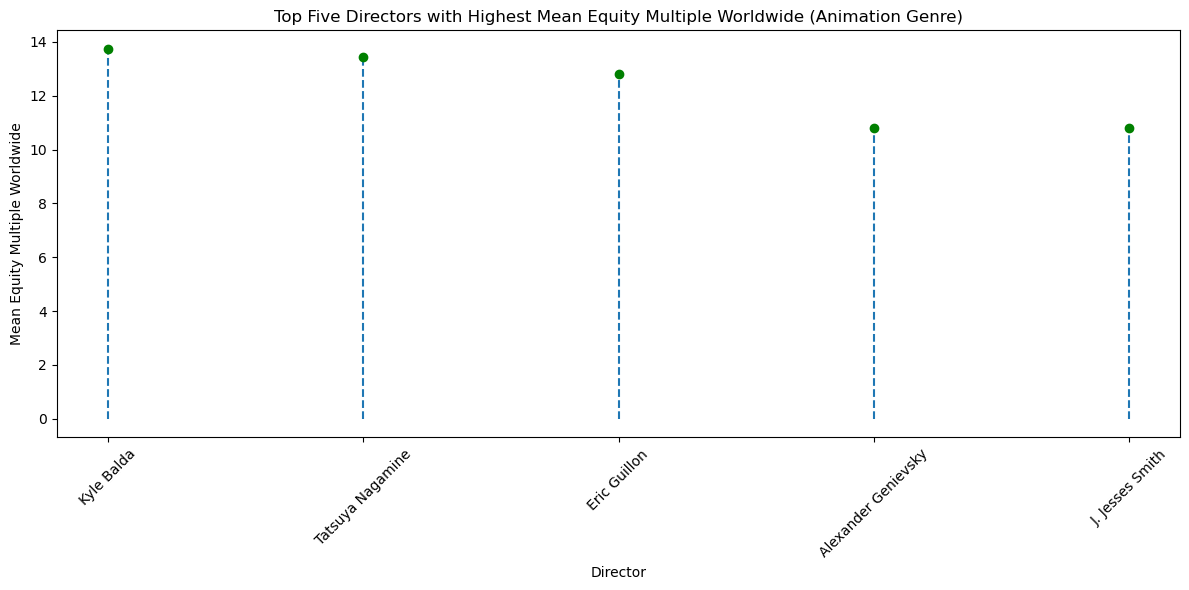

In [42]:
# Sort the data in descending order based on the mean Equity_multiple_Worldwide
top_directors = top_directors_animation_high_equity.sort_values(ascending=False).head(5)

# Create a lollipop graph to visualize the top five directors with high Equity_multiple_Worldwide
plt.figure(figsize=(12, 6))
plt.stem(top_directors.index, top_directors.values, linefmt='--', markerfmt='go', basefmt=' ')
plt.title('Top Five Directors with Highest Mean Equity Multiple Worldwide (Animation Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Equity Multiple Worldwide')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

# Strategy #2 
## The genres Horror & Mystery best fit if having Capital-Efficient/Higher Risk

### Horror Genre

In [43]:
genres_needed = ['Horror']
horror_melted_movies_filtered = melted_movies[(melted_movies["release_date"].dt.year > 2009) &( melted_movies["value"] == 1)  &
    (melted_movies["variable"].isin(genres_needed))]

Polish_horror = horror_melted_movies_filtered.drop_duplicates()
horror_US_directors_revenue = Polish_horror.merge(us_directors , on = ["title"])
horror_US_directors_revenue.sort_values(by='worldwide_profit', ascending=False)
Polish_horror2 = horror_US_directors_revenue.drop_duplicates()
Polish_horror2

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
0,2016-09-09,When the Bough Breaks,20768449,2.076845,Horror,1,Predrag Antonijevic
1,2016-09-09,When the Bough Breaks,20768449,2.076845,Horror,1,Jon Cassar
2,2011-09-30,Tucker & Dale vs. Evil,476793,0.095359,Horror,1,Eli Craig
3,2012-01-06,The Devil Inside,100759490,100.759490,Horror,1,William Brent Bell
4,2012-12-07,Deadfall,-4326365,-0.721061,Horror,1,Stefan Ruzowitzky
...,...,...,...,...,...,...,...
523,2018-06-08,Hereditary,60133905,6.013390,Horror,1,Ari Aster
524,2018-09-14,Mandy,-4572344,-0.762057,Horror,1,Adam Vermillion
525,2018-09-14,Mandy,-4572344,-0.762057,Horror,1,Panos Cosmatos
526,2015-03-20,Do You Believe?,12004931,5.219535,Horror,1,Jon Gunn


In [44]:
#DELETING A ROWS WHERE FROZEN WAS A ANIMATION MOVIE 
Polish_horror2.loc[Polish_horror2['primary_name'] == 'Jennifer Lee']
Polish_horror2 = Polish_horror2[(Polish_horror2['title'] != 'Frozen') | (Polish_horror2['primary_name'] != 'Jennifer Lee')]

In [45]:
#DELETING A ROWS WHERE FROZEN WAS A ANIMATION MOVIE 
Polish_horror2.loc[Polish_horror2['primary_name'] == 'Chris Buck']
Polish_horror2 = Polish_horror2[(Polish_horror2['title'] != 'Frozen') | (Polish_horror2['primary_name'] != 'Chris Buck')]

In [46]:
#DELETING A ROWS WHERE CAPTAIN MARVEL WAS A ANIMATION MOVIE 
Polish_horror2.loc[Polish_horror2['primary_name'] == 'Ryan Fleck']
Polish_horror2 = Polish_horror2[(Polish_horror2['title'] != 'Captain Marvel') | (Polish_horror2['primary_name'] != 'Ryan Fleck')]

In [47]:
#DELETING A ROWS WHERE CAPTAIN MARVEL WAS A ANIMATION MOVIE 
Polish_horror2.loc[Polish_horror2['primary_name'] == 'Anna Boden']
Polish_horror2 = Polish_horror2[(Polish_horror2['title'] != 'Captain Marvel') | (Polish_horror2['primary_name'] != 'Anna Boden')]

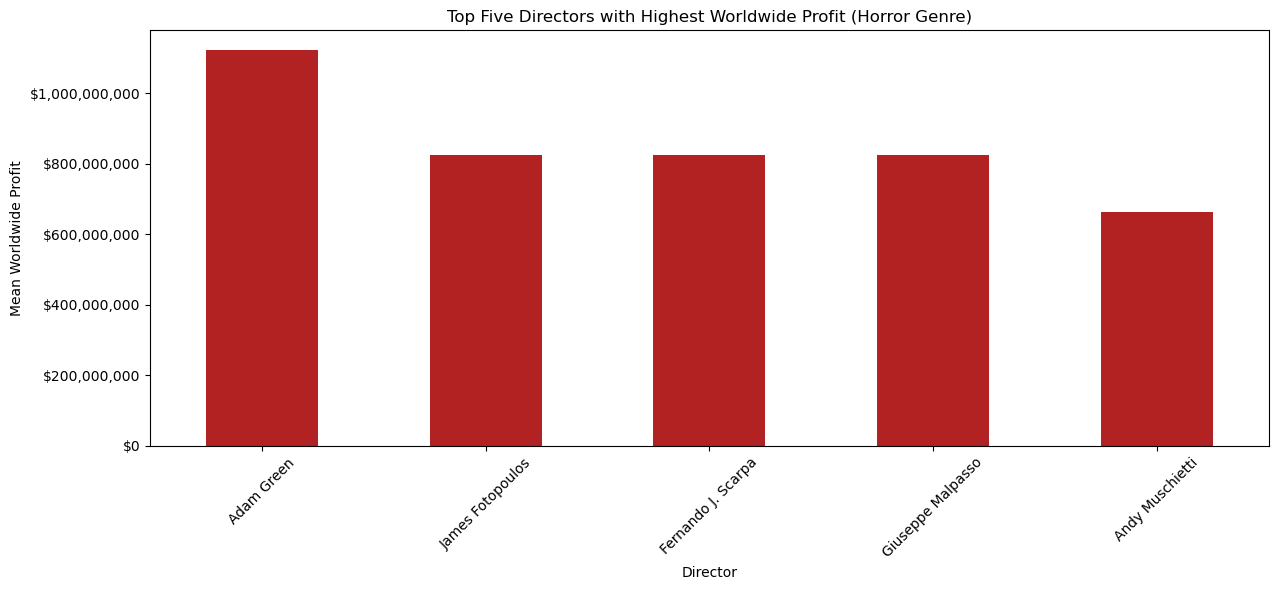

In [48]:
horror_director_profit_mean = Polish_horror2.groupby('primary_name')['worldwide_profit'].mean()

# Sort the data in descending order based on the mean worldwide profit
top_directors = horror_director_profit_mean.sort_values(ascending=False).head(5)

# Function to format y-axis as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create a bar plot to visualize the top five directors with high worldwide profit
plt.figure(figsize=(12, 6))
ax = top_directors.plot(kind='bar', color='firebrick')
plt.title('Top Five Directors with Highest Worldwide Profit (Horror Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Worldwide Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Apply currency formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.show()

In [49]:
horror_directors_Equity_multiple_Worldwide = Polish_horror2.groupby('primary_name')['Equity_multiple_Worldwide'].mean()
top_directors_horror_high_equity = horror_directors_Equity_multiple_Worldwide.sort_values(ascending=False).head(5)
top_directors_horror_high_equity

primary_name
Travis Cluff          415.564740
Chris Lofing          415.564740
William Brent Bell    100.759490
Levan Gabriadze        63.364198
Tod Williams           58.170677
Name: Equity_multiple_Worldwide, dtype: float64

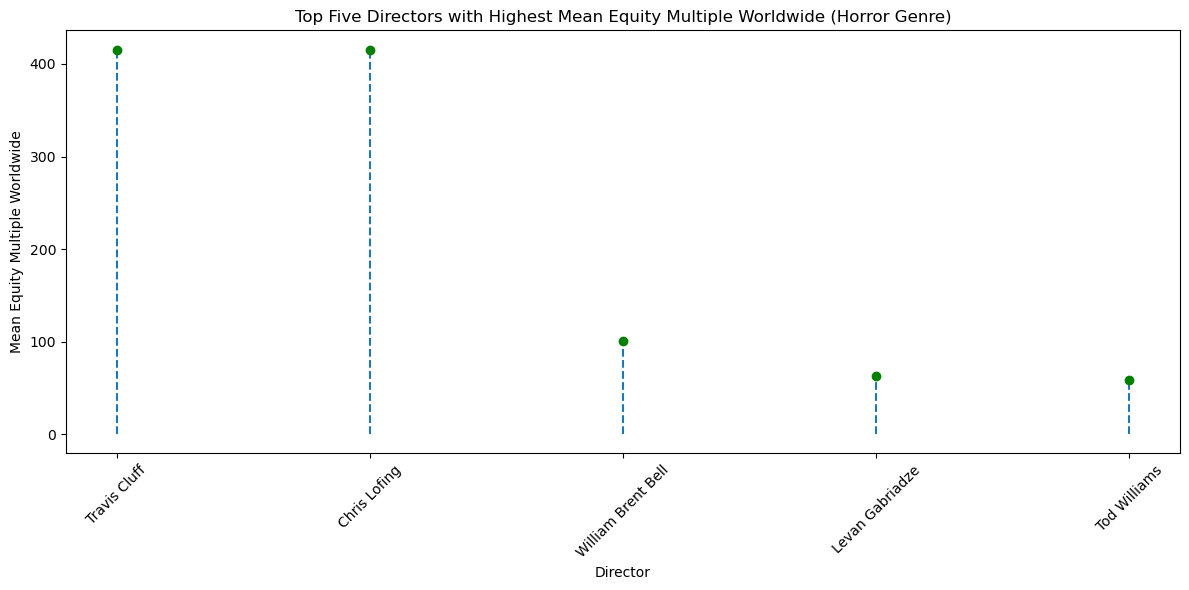

In [50]:
# Group the data by director's name and calculate the mean Equity_multiple_Worldwide
horror_director_equity_mean = Polish_horror2.groupby('primary_name')['Equity_multiple_Worldwide'].mean()

# Sort the data in descending order based on the mean Equity_multiple_Worldwide
top_directors = horror_director_equity_mean.sort_values(ascending=False).head(5)

# Create a lollipop graph to visualize the top five directors with high Equity_multiple_Worldwide
plt.figure(figsize=(12, 6))
plt.stem(top_directors.index, top_directors.values, linefmt='--', markerfmt='go', basefmt=' ')
plt.title('Top Five Directors with Highest Mean Equity Multiple Worldwide (Horror Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Equity Multiple Worldwide')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

### Mystery Genre

In [51]:
genres_needed = ['Mystery']
mystery_melted_movies_filtered = melted_movies[(melted_movies["release_date"].dt.year > 2009) &( melted_movies["value"] == 1)  &
    (melted_movies["variable"].isin(genres_needed))]

Polish_mystery = mystery_melted_movies_filtered.drop_duplicates()
mystery_US_directors_revenue = Polish_mystery.merge(us_directors , on = ["title"])
mystery_US_directors_revenue.sort_values(by='Equity_multiple_Worldwide', ascending=False)

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
311,2015-07-10,The Gallows,41556474,415.564740,Mystery,1,Chris Lofing
312,2015-07-10,The Gallows,41556474,415.564740,Mystery,1,Travis Cluff
1,2012-01-06,The Devil Inside,100759490,100.759490,Mystery,1,William Brent Bell
239,2011-04-01,Insidious,98370886,65.580591,Mystery,1,James Wan
314,2015-04-17,Unfriended,63364198,63.364198,Mystery,1,Levan Gabriadze
...,...,...,...,...,...,...,...
350,2015-04-21,Ten,-25000,-1.000000,Mystery,1,Sophia Cacciola
351,2015-04-21,Ten,-25000,-1.000000,Mystery,1,Chris Robert
324,2014-12-31,The Sound and the Shadow,-500000,-1.000000,Mystery,1,Justin Paul Miller
17,2015-08-11,Alleluia! The Devil's Carnival,-500000,-1.000000,Mystery,1,Darren Lynn Bousman


In [52]:
mystery_US_directors_revenue.groupby('primary_name')['worldwide_profit'].mean()
mystery_US_directors_revenue.sort_values(by='Equity_multiple_Worldwide', ascending=False)

,release_date,title,worldwide_profit,Equity_multiple_Worldwide,variable,value,primary_name
311,2015-07-10,The Gallows,41556474,415.564740,Mystery,1,Chris Lofing
312,2015-07-10,The Gallows,41556474,415.564740,Mystery,1,Travis Cluff
1,2012-01-06,The Devil Inside,100759490,100.759490,Mystery,1,William Brent Bell
239,2011-04-01,Insidious,98370886,65.580591,Mystery,1,James Wan
314,2015-04-17,Unfriended,63364198,63.364198,Mystery,1,Levan Gabriadze
...,...,...,...,...,...,...,...
350,2015-04-21,Ten,-25000,-1.000000,Mystery,1,Sophia Cacciola
351,2015-04-21,Ten,-25000,-1.000000,Mystery,1,Chris Robert
324,2014-12-31,The Sound and the Shadow,-500000,-1.000000,Mystery,1,Justin Paul Miller
17,2015-08-11,Alleluia! The Devil's Carnival,-500000,-1.000000,Mystery,1,Darren Lynn Bousman


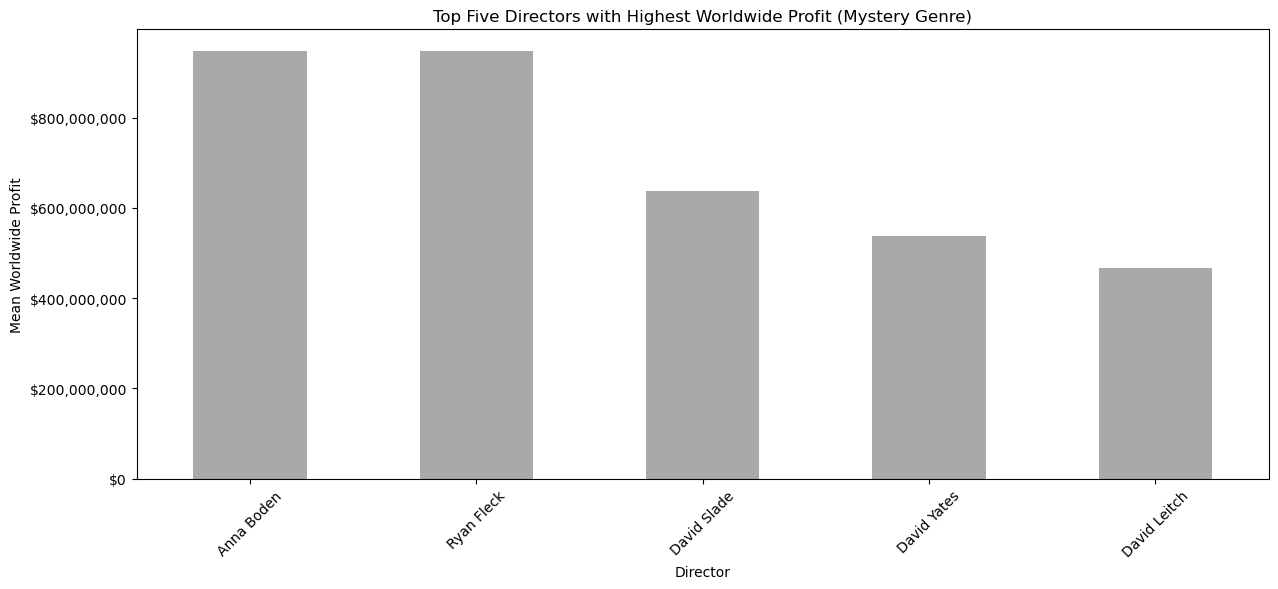

In [53]:
mystery_director_profit_mean = mystery_US_directors_revenue.groupby('primary_name')['worldwide_profit'].mean()

# Sort the data in descending order based on the mean worldwide profit
top_directors = mystery_director_profit_mean.sort_values(ascending=False).head(5)

# Function to format y-axis as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create a bar plot to visualize the top five directors with high worldwide profit
plt.figure(figsize=(12, 6))
ax = top_directors.plot(kind='bar', color='darkgrey')
plt.title('Top Five Directors with Highest Worldwide Profit (Mystery Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Worldwide Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

In [54]:
mystery_directors_Equity_multiple_Worldwide = mystery_US_directors_revenue.groupby('primary_name')['Equity_multiple_Worldwide'].mean()
top_directors_mystery_high_equity = mystery_directors_Equity_multiple_Worldwide.sort_values(ascending=False).head(5)
top_directors_mystery_high_equity

primary_name
Travis Cluff          415.564740
Chris Lofing          415.564740
William Brent Bell    100.759490
Levan Gabriadze        63.364198
Bradley Parker         41.411721
Name: Equity_multiple_Worldwide, dtype: float64

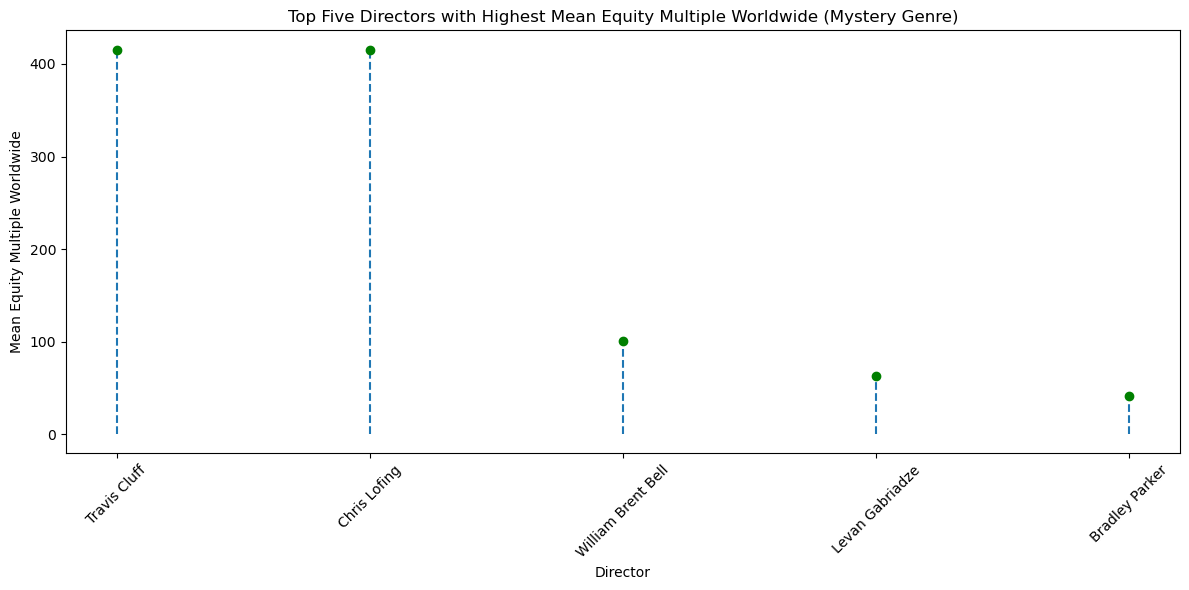

In [55]:
# Group the data by director's name and calculate the mean Equity_multiple_Worldwide
mystery_director_equity_mean = mystery_US_directors_revenue.groupby('primary_name')['Equity_multiple_Worldwide'].mean()

# Sort the data in descending order based on the mean Equity_multiple_Worldwide
top_directors = mystery_director_equity_mean.sort_values(ascending=False).head(5)

# Create a lollipop graph to visualize the top five directors with high Equity_multiple_Worldwide
plt.figure(figsize=(12, 6))
plt.stem(top_directors.index, top_directors.values, linefmt='--', markerfmt='go', basefmt=' ')
plt.title('Top Five Directors with Highest Mean Equity Multiple Worldwide (Mystery Genre)')
plt.xlabel('Director')
plt.ylabel('Mean Equity Multiple Worldwide')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

# Recommendations 

### Release Date
Summer movies performed significantly better than seasons
- June possessed the highest mean profit and equity multiple of all months
- Movies released during the summer months outperformed winter and fall releases significantly in terms of gross profits and equity multiples

### Director with best ROI in Strategic # 1
- Genre Aventure : Lynn Shelton, Josh Boone, and Michael Tiddes
- Genre Animation : Kyle Balda, Tatsuya Nagamine and Eric Guillon   
### Director with best Profit in Strategic # 1
- Genre Aventure : Anthony Russo, Joe Russo, and Colin Trevorrow
- Genre Animation : Adam Green, Jennifer Lee, Chris Buck

### Director with best ROI in Strategic # 2
- Genre Horror and Genre Mystery : Chris Lofing, Travis Cluff, and William Brent Bell
### Director with best Profit in Strategic # 2
- Genre Horror : Adam Green, James Fotopoulos, and Fernando J. Scarpa
- Genre Mystery : Ryan Fleck, Anna Boden, David Slade

# Further Considerations & Uncertainties

- Production Budget as defined in this analysis does not include marketing & distribution costs and therefore the equity multiples here may not portray a full comprehensive picture of investor returns.
- Procuring marketing budget information would provide a fuller picture of historical investor returns.
